In [1]:
#Importing the required packages/libraries
import pandas as pd
import numpy as np
import nltk
import sklearn.metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# For visualizations
import matplotlib.pyplot as plt

import scipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas_profiling
from pandas_profiling import ProfileReport

import re
# For handling string
import string
# For performing mathematical operations
import math

import sklearn
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

import scipy


from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [2]:
# Importing dataset
df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Individual Assignment/sentiment_train.csv') 
test_df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Individual Assignment/sentiment_test.csv')
test_df1=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Individual Assignment/sentiment_test.csv')

print("Shape of data=>",df.shape)
print("Shape of data=>",test_df.shape)
df.head()
test_df.head()

Shape of data=> (2202, 2)
Shape of data=> (546, 2)


,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


,Sentence,Polarity
0,A good commentary of today's love and undoubte...,1
1,For people who are first timers in film making...,1
2,"It was very popular when I was in the cinema, ...",1
3,It's a feel-good film and that's how I felt wh...,1
4,It has northern humour and positive about the ...,1


In [3]:
#Check if data is imbalanced
df['Polarity'].value_counts()
test_df['Polarity'].value_counts()

0    1113
1    1089
Name: Polarity, dtype: int64

1    297
0    249
Name: Polarity, dtype: int64

In [4]:
#Check first 30 sentences from train dataset
i=0
while i<50:
    print ("Sentence Number ",i)
    print()
    print(df['Sentence'][i],df['Polarity'][i])
    print()
    i=i+1
    

Sentence Number  0

Wow... Loved this place. 1

Sentence Number  1

Crust is not good. 0

Sentence Number  2

Not tasty and the texture was just nasty. 0

Sentence Number  3

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. 1

Sentence Number  4

The selection on the menu was great and so were the prices. 1

Sentence Number  5

Now I am getting angry and I want my damn pho. 0

Sentence Number  6

Honeslty it didn't taste THAT fresh.) 0

Sentence Number  7

The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer. 0

Sentence Number  8

The fries were great too. 1

Sentence Number  9

A great touch. 1

Sentence Number  10

Service was very prompt. 1

Sentence Number  11

Would not go back. 0

Sentence Number  12

The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced. 0

Sentence Number  13

I tried the Cape Cod ravoli, chicken,with cranberry...mmmm! 1

In [5]:
#Check first 30 sentences from test dataset
i=0
while i<50:
    print ("Sentence Number ",i)
    print()
    print(test_df['Sentence'][i],test_df['Polarity'][i])
    print()
    i=i+1

Sentence Number  0

A good commentary of today's love and undoubtedly a film worth seeing.   1

Sentence Number  1

For people who are first timers in film making, I think they did an excellent job!!   1

Sentence Number  2

It was very popular when I was in the cinema, a good house and very good reactions and plenty of laughs.   1

Sentence Number  3

It's a feel-good film and that's how I felt when I came out of the cinema!   1

Sentence Number  4

It has northern humour and positive about the community it represents.   1

Sentence Number  5

I rather enjoyed it.   1

Sentence Number  6

I liked it.   1

Sentence Number  7

I couldn't take them seriously.   0

Sentence Number  8

It really created a unique feeling though.   1

Sentence Number  9

Vivian Schilling did an excellent job with the script.   1

Sentence Number  10

A world better than 95% of the garbage in the theatres today.   1

Sentence Number  11

Her role was played well.   1

Sentence Number  12

Not too screamy not 

In [6]:
# Remove ,,, from entries in sentences
df['Sentence'] = df['Sentence'].str.replace(r'\,,,','')
df['Sentence'].unique()

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.', ...,
       "Unfortunately, 'Cover Girl' is an example of how Hollywood used to exploit women for financial gain.  ",
       'Non-linear narration thus many flashbacks and every part are articulated quite well.  ',
       'The good cinematography also makes her and Monica Bellucci look very beautiful.  '],
      dtype=object)

In [7]:
#Check first 30 reviews from train dataset
i=0
while i<50:
    print ("Sentence ",i)
    print()
    print(df['Sentence'][i])
    print()
    i=i+1
    


Sentence  0

Wow... Loved this place.

Sentence  1

Crust is not good.

Sentence  2

Not tasty and the texture was just nasty.

Sentence  3

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.

Sentence  4

The selection on the menu was great and so were the prices.

Sentence  5

Now I am getting angry and I want my damn pho.

Sentence  6

Honeslty it didn't taste THAT fresh.)

Sentence  7

The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.

Sentence  8

The fries were great too.

Sentence  9

A great touch.

Sentence  10

Service was very prompt.

Sentence  11

Would not go back.

Sentence  12

The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.

Sentence  13

I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!

Sentence  14

I was disgusted because I was pretty sure that was human hair.

Sentence  15

I was shocked because no signs i

In [8]:
#Remove contractions from sentences in train dataset
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the sentences
df['Sentence']=df['Sentence'].apply(lambda x:expand_contractions(x))

In [9]:
#Check first 30 reviews from train dataset
i=0
while i<50:
    print ("Sentence ",i)
    print()
    print(df['Sentence'][i])
    print()
    i=i+1
    

Sentence  0

Wow... Loved this place.

Sentence  1

Crust is not good.

Sentence  2

Not tasty and the texture was just nasty.

Sentence  3

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.

Sentence  4

The selection on the menu was great and so were the prices.

Sentence  5

Now I am getting angry and I want my damn pho.

Sentence  6

Honeslty it did not taste THAT fresh.)

Sentence  7

The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.

Sentence  8

The fries were great too.

Sentence  9

A great touch.

Sentence  10

Service was very prompt.

Sentence  11

Would not go back.

Sentence  12

The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.

Sentence  13

I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!

Sentence  14

I was disgusted because I was pretty sure that was human hair.

Sentence  15

I was shocked because no signs 

In [10]:
#Convert sentences from train dataset into Lowercase 
df['Sentence']=df['Sentence'].str.lower()


In [11]:
#Remove digits and words containing digits from sentences in train dataset
df['Sentence']=df['Sentence'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [12]:
#Remove Punctuations from sentences in train dataset
df['Sentence']=df['Sentence'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [13]:
#Sentiment Analysis of sentences(Calculating polarity score) in train dataset
from textblob import TextBlob
df['new_polarity']=df['Sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [14]:
#Check first 30 sentences from train dataset after cleaning 
i=0
while i<50:
    print ("Sentence Number ",i)
    print()
    print(df['Sentence'][i],df['Polarity'][i])
    print()
    i=i+1

Sentence Number  0

wow loved this place 1

Sentence Number  1

crust is not good 0

Sentence Number  2

not tasty and the texture was just nasty 0

Sentence Number  3

stopped by during the late may bank holiday off rick steve recommendation and loved it 1

Sentence Number  4

the selection on the menu was great and so were the prices 1

Sentence Number  5

now i am getting angry and i want my damn pho 0

Sentence Number  6

honeslty it did not taste that fresh 0

Sentence Number  7

the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer 0

Sentence Number  8

the fries were great too 1

Sentence Number  9

a great touch 1

Sentence Number  10

service was very prompt 1

Sentence Number  11

would not go back 0

Sentence Number  12

the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced 0

Sentence Number  13

i tried the cape cod ravoli chickenwith cranberrymmmm 1

Sentence Number  14


In [15]:
#Commonly occuring words from sentences in train dataset
freq = pd.Series(' '.join(df['Sentence']).split()).value_counts()[:10]
freq

the     1412
i        846
and      846
is       664
a        606
it       585
to       514
was      485
this     462
not      431
dtype: int64

In [16]:
#removal of commonly occuring irrelevant words from sentences in train dataset
freq = list(freq)
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Sentence'].head()

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Sentence, dtype: object

In [17]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['Sentence'] = df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df)


                                               Sentence  Polarity  \
0                                       wow loved place         1   
1                                            crust good         0   
2                                   tasty texture nasty         0   
3     stopped late may bank holiday rick steve recom...         1   
4                           selection menu great prices         1   
...                                                 ...       ...   
2197       almost songs cover girl oldfashioned tuneful         0   
2198  annoying thing cover girl way rita hayworth pu...         0   
2199  unfortunately cover girl example hollywood use...         0   
2200  nonlinear narration thus many flashbacks every...         1   
2201  good cinematography also makes monica bellucci...         1   

      new_polarity  
0             0.40  
1            -0.35  
2            -1.00  
3             0.20  
4             0.80  
...            ...  
2197         -0.10  
219

In [18]:
#Lemmatization

from textblob import Word
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Sentence'].head()

0                                      wow loved place
1                                           crust good
2                                  tasty texture nasty
3    stopped late may bank holiday rick steve recom...
4                           selection menu great price
Name: Sentence, dtype: object

In [19]:
#Check first 30 sentences from training dataset after cleaning 
i=0
while i<50:
    print ("Sentence Number ",i)
    print()
    print(df['Sentence'][i],df['Polarity'][i],df['new_polarity'][i])
    print()
    i=i+1

Sentence Number  0

wow loved place 1 0.39999999999999997

Sentence Number  1

crust good 0 -0.35

Sentence Number  2

tasty texture nasty 0 -1.0

Sentence Number  3

stopped late may bank holiday rick steve recommendation loved 1 0.19999999999999998

Sentence Number  4

selection menu great price 1 0.8

Sentence Number  5

getting angry want damn pho 0 -0.5

Sentence Number  6

honeslty taste fresh 0 0.3

Sentence Number  7

potato like rubber could tell made ahead time kept warmer 0 0.0

Sentence Number  8

fry great 1 0.8

Sentence Number  9

great touch 1 0.8

Sentence Number  10

service prompt 1 0.2

Sentence Number  11

would go back 0 0.0

Sentence Number  12

cashier care ever say still ended wayyy overpriced 0 0.0

Sentence Number  13

tried cape cod ravoli chickenwith cranberrymmmm 1 0.0

Sentence Number  14

disgusted pretty sure human hair 0 -0.0625

Sentence Number  15

shocked sign indicate cash 0 -0.35

Sentence Number  16

highly recommended 1 0.16

Sentence Number  17

In [20]:
#Word Count of sentences in training dataset

df['word_count'] = df['Sentence'].apply(lambda x: len(str(x).split(" ")))
df[['Sentence','word_count']].head()

,Sentence,word_count
0,wow loved place,3
1,crust good,2
2,tasty texture nasty,3
3,stopped late may bank holiday rick steve recom...,9
4,selection menu great price,4


In [21]:
#Feature Engineering based on sentences in training dataset

df['wow_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('wow')]))

df['loved_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('loved')]))

df['great_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('great')]))

df['highly_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('highly')]))

df['amazing_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('amazing')]))

df['like_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('like')]))

df['excellent_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('excellent')]))


df.head()


,Sentence,Polarity,new_polarity,word_count,wow_count,loved_count,great_count,highly_count,amazing_count,like_count,excellent_count
0,wow loved place,1,0.40,3,1,1,0,0,0,0,0
1,crust good,0,-0.35,2,0,0,0,0,0,0,0
2,tasty texture nasty,0,-1.00,3,0,0,0,0,0,0,0
3,stopped late may bank holiday rick steve recom...,1,0.20,9,0,1,0,0,0,0,0
4,selection menu great price,1,0.80,4,0,0,1,0,0,0,0


In [22]:
#TFID Vectorization of sentences from training dataset

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500, lowercase=True, stop_words = 'english', ngram_range=(1, 3), min_df =0.001,max_df=0.4)
#fit the vectorizers to the data.
features = vectorizer.fit_transform(df['Sentence'])
pandaframe = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())



In [23]:
#Checking features
pandaframe

,absolutely,acting,actor,actually,ago,amazing,amazon,ambiance,area,arrived,...,working,world,worse,worst,worth,writing,wrong,year,zero,zero star
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Concatenating features and vetorized features for ML
df1=df[['new_polarity','word_count','wow_count','loved_count','great_count','highly_count','amazing_count','Polarity']]
df2= pd.concat([pandaframe.reset_index(drop=True), df1.reset_index(drop=True)], axis=1)

In [25]:
#Labels and text and other features were separated 
#Splitting the data into train and test dataset

X = df2.drop(["Polarity"], axis=1)

y = df2["Polarity"]

X_train, X_test, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df2["Polarity"].values)

In [26]:
#Text Preprocessing on Test Dataset


# Remove ,,, from entries in name column
test_df['Sentence'] = test_df['Sentence'].str.replace(r'\,,,','')
test_df['Sentence'].unique()

#Remove contractions from sentences
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the sentences
test_df['Sentence']=test_df['Sentence'].apply(lambda x:expand_contractions(x))

#Converting sentences to Lowercase 
test_df['Sentence']=test_df['Sentence'].str.lower()

#Remove digits and words containing digits from sentences
test_df['Sentence']=test_df['Sentence'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations from sentences
test_df['Sentence']=test_df['Sentence'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Sentiment Analysis 
from textblob import TextBlob
test_df['new_polarity']=test_df['Sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)

#Commonly occuring words from sentences
freq_test = pd.Series(' '.join(test_df['Sentence']).split()).value_counts()[:10]
freq_test

#removal of commonly occuring irrelevant words from sentences
freq_test = list(freq_test)
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test))
test_df['Sentence'].head()


# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(test_df)

#Lemmatization

from textblob import Word
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test_df['Sentence'].head()


#Word Count
test_df['word_count'] = test_df['Sentence'].apply(lambda x: len(str(x).split(" ")))
test_df[['Sentence','word_count']].head()


#Feature Engineering

test_df['wow_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('wow')]))

test_df['loved_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('loved')]))

test_df['great_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('great')]))

test_df['highly_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('highly')]))

test_df['amazing_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('amazing')]))

test_df['like_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('like')]))

test_df['excellent_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('excellent')]))

test_df.head()


array(["A good commentary of today's love and undoubtedly a film worth seeing.  ",
       'For people who are first timers in film making, I think they did an excellent job!!  ',
       'It was very popular when I was in the cinema, a good house and very good reactions and plenty of laughs.  ',
       "It's a feel-good film and that's how I felt when I came out of the cinema!  ",
       'It has northern humour and positive about the community it represents.  ',
       'I rather enjoyed it.  ', 'I liked it.  ',
       "I couldn't take them seriously.  ",
       'It really created a unique feeling though.  ',
       'Vivian Schilling did an excellent job with the script.  ',
       'A world better than 95% of the garbage in the theatres today.  ',
       'Her role was played well.  ',
       'Not too screamy not to masculine but just right.  ',
       'The camera really likes her in this movie.  ',
       'I would have casted her in that role after ready the script.  ',
       "As a Euro

the     527
is      338
and     283
a       279
of      232
it      189
this    177
i       177
to      152
in      141
dtype: int64

0    a good commentary of today is love and undoubt...
1    for people who are first timers in film making...
2    it was very popular when i was in the cinema a...
3    it is a feelgood film and that is how i felt w...
4    it has northern humour and positive about the ...
Name: Sentence, dtype: object

                                              Sentence  Polarity  new_polarity
0    good commentary today love undoubtedly film wo...         1      0.500000
1    people first timers film making think excellen...         1      0.625000
2    popular cinema good house good reactions plent...         1      0.796667
3                       feelgood film felt came cinema         1      0.000000
4        northern humour positive community represents         1      0.227273
..                                                 ...       ...           ...
541      got bored watching jessice lange take clothes         0     -0.500000
542  unfortunately virtue film production work lost...         0     -0.500000
543                                  word embarrassing         0      0.000000
544                                  exceptionally bad         0     -0.700000
545           insult one intelligence huge waste money         0      0.100000

[546 rows x 3 columns]


0    good commentary today love undoubtedly film wo...
1    people first timer film making think excellent...
2    popular cinema good house good reaction plenty...
3                       feelgood film felt came cinema
4        northern humour positive community represents
Name: Sentence, dtype: object

,Sentence,word_count
0,good commentary today love undoubtedly film wo...,8
1,people first timer film making think excellent...,8
2,popular cinema good house good reaction plenty...,8
3,feelgood film felt came cinema,5
4,northern humour positive community represents,5


,Sentence,Polarity,new_polarity,word_count,wow_count,loved_count,great_count,highly_count,amazing_count,like_count,excellent_count
0,good commentary today love undoubtedly film wo...,1,0.500000,8,0,0,0,0,0,0,0
1,people first timer film making think excellent...,1,0.625000,8,0,0,0,0,0,0,1
2,popular cinema good house good reaction plenty...,1,0.796667,8,0,0,0,0,0,0,0
3,feelgood film felt came cinema,1,0.000000,5,0,0,0,0,0,0,0
4,northern humour positive community represents,1,0.227273,5,0,0,0,0,0,0,0


In [27]:
#Test Dataset Text Vectorizer  

#fit the vectorizers to the test data

features1 = vectorizer.transform(test_df['Sentence'])
pandaframe1 = pd.DataFrame(features1.toarray(), columns=vectorizer.get_feature_names())

df4=test_df[['new_polarity','word_count','wow_count','loved_count','great_count','highly_count','amazing_count','Polarity']]

df5= pd.concat([pandaframe1.reset_index(drop=True), df4.reset_index(drop=True)], axis=1)

In [28]:
pandaframe1

,absolutely,acting,actor,actually,ago,amazing,amazon,ambiance,area,arrived,...,working,world,worse,worst,worth,writing,wrong,year,zero,zero star
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.478098,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [29]:
#Separating text, other features and label features
X_Test = df5.drop(["Polarity"], axis=1)

Y_Test = df5["Polarity"]

In [30]:
#Setting up the Random Forest Classifier Hyperparameter Tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

print(random_grid)

# Use the RF GridSearch to search for best hyperparameters
from sklearn.ensemble import RandomForestClassifier as RFC

rf_model = RFC(random_state=42)

rf = GridSearchCV(rf_model,random_grid, cv=3,verbose=10,scoring='f1',n_jobs=-1)

# Fit the random search model
rf.fit(X_train, train_label)

{'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': ['auto'], 'max_depth': [10, 12, 15, 17, 20, None], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}
Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 12, 15, 17, 20, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50]},
             scoring='f1', verbose=10)

[[175  48]
 [ 39 179]]


(175, 48, 39, 179)

AUC Score = 0.803
F1 Score = 0.803

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       223
           1       0.79      0.82      0.80       218

    accuracy                           0.80       441
   macro avg       0.80      0.80      0.80       441
weighted avg       0.80      0.80      0.80       441



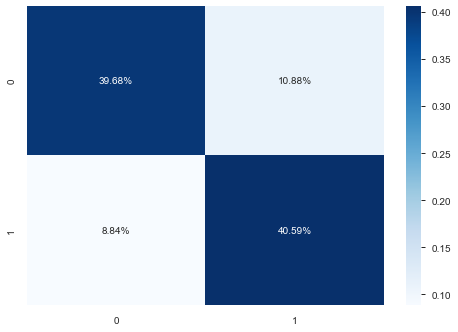

In [31]:
# Predicting performance of hypertuned Random Forest Classifier on test dataset

pred_test_rf = rf.predict(X_test)


#Get the confusion matrix
cf_matrix = confusion_matrix(test_label,pred_test_rf)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(test_label,pred_test_rf).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(test_label, pred_test_rf)))
print("F1 Score = {:.3f}".format(f1_score(test_label, pred_test_rf,average="micro")))
print()
print(classification_report(test_label, pred_test_rf))


[[212  37]
 [ 94 203]]


(212, 37, 94, 203)

AUC Score = 0.767
F1 = 0.760

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       249
           1       0.85      0.68      0.76       297

    accuracy                           0.76       546
   macro avg       0.77      0.77      0.76       546
weighted avg       0.78      0.76      0.76       546



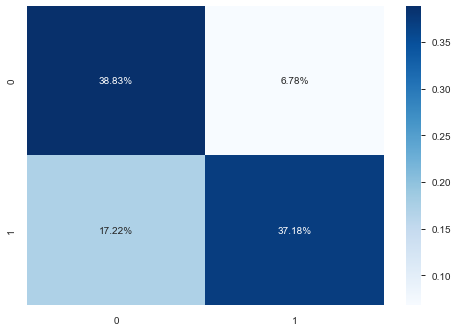

In [32]:
# Predicting performance of hypertuned Random Forest Classifier on actual Test dataset

pred_test_rf = rf.predict(X_Test)


#Get the confusion matrix
cf_matrix = confusion_matrix(Y_Test,pred_test_rf)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(Y_Test,pred_test_rf).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(Y_Test, pred_test_rf)))
print("F1 = {:.3f}".format(f1_score(Y_Test, pred_test_rf,average="micro")))
print()
print(classification_report(Y_Test, pred_test_rf))

In [33]:
#Publishing the top and bottom 10 important features

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

feature_names = vectorizer.get_feature_names()+['new_polarity','word_count','wow_count','loved_count','great_count','highly_count','amazing_count']
len(feature_names)


feature_importances = rf.best_estimator_.feature_importances_

feat_imp= pd.concat([pd.DataFrame(feature_names,columns=["Feature_Names"],dtype=str).reset_index(drop=True),pd.DataFrame(feature_importances,columns=["Feature_Importance"],dtype=float).reset_index(drop=True) ], axis=1)

feat_imp['Feature_Importance']=feat_imp['Feature_Importance'].round(5)
feat_imp.sort_values(by="Feature_Importance",ascending=False).head(10)
feat_imp.sort_values(by="Feature_Importance",ascending=False).tail(10)

507

,Feature_Names,Feature_Importance
500,new_polarity,0.33998
191,great,0.04338
504,great_count,0.04055
186,good,0.03379
284,nice,0.01775
260,love,0.01553
501,word_count,0.01451
315,place,0.01021
21,bad,0.00996
105,definitely,0.00908


,Feature_Names,Feature_Importance
299,owned,0.0
138,eaten,0.0
290,ok,0.0
79,clip,0.0
400,stay,0.0
75,clarity,0.0
403,store,0.0
404,story,0.0
140,egg,0.0
422,tender,0.0


In [34]:
#Analyzing the instances with wrong predictions

from treeinterpreter import treeinterpreter as ti

prediction, bias, contributions = ti.predict(rf.best_estimator_, X_Test)

for i in range(len(test_df)):
        if Y_Test[i] == pred_test_rf[i]:
            continue
        print("Instance {}".format(i))
        print("Original Statement: {}".format(test_df1['Sentence'].iloc[i]))
        print("Statement after text pre-processing: {}".format(test_df['Sentence'].iloc[i]))
        print("Bias (trainset mean): {}".format(bias[i]))
        print("Actual Label: {}".format(Y_Test[i]))
        print("Prediction: {}".format(prediction[i, :]))
        print("Feature contributions:")
        con = pd.DataFrame(data={'feature': feature_names,
                                 'value': X_Test.iloc[i],
                                 'neg_senti contr': contributions[i][:, 0],
                                 'Polarity contr': contributions[i][:, 1],
                                 'abs Polarity contr': abs(contributions[i][:, 1])})
        con = con.sort_values(by="abs Polarity contr", ascending=False)
        con['Polarity cumulative'] = con['Polarity contr'].cumsum() + bias[i][1]
        con.head(30)
        print("-"*20)

C:\Users\anuj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


Instance 3
Original Statement: It's a feel-good film and that's how I felt when I came out of the cinema!  
Statement after text pre-processing: feelgood film felt came cinema
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.76742467 0.23257533]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.110731,-0.110731,0.110731,0.385096
great,great,0.000000,0.015208,-0.015208,0.015208,0.369888
good,good,0.000000,0.015069,-0.015069,0.015069,0.354819
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.340232
film,film,0.560823,0.011163,-0.011163,0.011163,0.329069
word_count,word_count,5.000000,0.010202,-0.010202,0.010202,0.318867
came,came,0.545160,-0.009506,0.009506,0.009506,0.328372
love,love,0.000000,0.006397,-0.006397,0.006397,0.321975
work,work,0.000000,0.005878,-0.005878,0.005878,0.316097
definitely,definitely,0.000000,0.005368,-0.005368,0.005368,0.310730


--------------------
Instance 11
Original Statement: Her role was played well.  
Statement after text pre-processing: role played well
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.72151863 0.27848137]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.109839,-0.109839,0.109839,0.385988
word_count,word_count,3.0,-0.031510,0.031510,0.031510,0.417497
good,good,0.0,0.016213,-0.016213,0.016213,0.401284
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.385238
great,great,0.0,0.015208,-0.015208,0.015208,0.370030
nice,nice,0.0,0.006218,-0.006218,0.006218,0.363812
love,love,0.0,0.005987,-0.005987,0.005987,0.357826
bad,bad,0.0,-0.005473,0.005473,0.005473,0.363299
work,work,0.0,0.005405,-0.005405,0.005405,0.357893
definitely,definitely,0.0,0.005248,-0.005248,0.005248,0.352646


--------------------
Instance 33
Original Statement: It came free with a DVD player I bought but I still turned the thing off halfway through because I was embarrassed for Howell.  
Statement after text pre-processing: came free dvd player bought still turned thing halfway embarrassed howell
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.31015594 0.68984406]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.400000,-0.258731,0.258731,0.258731,0.754557
bought,bought,0.495303,0.021381,-0.021381,0.021381,0.733176
great,great,0.000000,0.020311,-0.020311,0.020311,0.712865
good,good,0.000000,0.019908,-0.019908,0.019908,0.692958
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.678370
thing,thing,0.433392,-0.014369,0.014369,0.014369,0.692740
came,came,0.461919,0.008586,-0.008586,0.008586,0.684154
nice,nice,0.000000,0.008463,-0.008463,0.008463,0.675691
love,love,0.000000,0.005347,-0.005347,0.005347,0.670344
excellent,excellent,0.000000,0.004266,-0.004266,0.004266,0.666077


--------------------
Instance 36
Original Statement: The soundtrack wasn't terrible, either.  
Statement after text pre-processing: soundtrack terrible either
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.6048422 0.3951578]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
terrible,terrible,1.0,0.216996,-0.216996,0.216996,0.278830
new_polarity,new_polarity,0.5,-0.148071,0.148071,0.148071,0.426901
good,good,0.0,0.013789,-0.013789,0.013789,0.413113
great,great,0.0,0.011421,-0.011421,0.011421,0.401692
word_count,word_count,3.0,-0.010556,0.010556,0.010556,0.412248
great_count,great_count,0.0,0.009575,-0.009575,0.009575,0.402672
nice,nice,0.0,0.005516,-0.005516,0.005516,0.397156
love,love,0.0,0.003761,-0.003761,0.003761,0.393394
fantastic,fantastic,0.0,0.003385,-0.003385,0.003385,0.390009
minute,minute,0.0,-0.003264,0.003264,0.003264,0.393273


--------------------
Instance 38
Original Statement: Still, it was the SETS that got a big "10" on my "oy-vey" scale.  
Statement after text pre-processing: still set got big oyvey scale
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.56886846 0.43113154]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
set,set,0.637192,-0.189605,0.189605,0.189605,0.685432
new_polarity,new_polarity,0.000000,0.121632,-0.121632,0.121632,0.563800
big,big,0.583312,-0.019692,0.019692,0.019692,0.583491
good,good,0.000000,0.017060,-0.017060,0.017060,0.566431
word_count,word_count,6.000000,0.015879,-0.015879,0.015879,0.550552
great,great,0.000000,0.015208,-0.015208,0.015208,0.535344
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.520757
nice,nice,0.000000,0.005714,-0.005714,0.005714,0.515043
love,love,0.000000,0.005396,-0.005396,0.005396,0.509647
work,work,0.000000,0.004397,-0.004397,0.004397,0.505250


--------------------
Instance 39
Original Statement: Yes, I am simplifying things here for the sake of brevity, for this really is at the core of the problems with this film - it has too much going on without any real, fulfilling explanation.  
Statement after text pre-processing: yes simplifying thing sake brevity really core problem film much going without real fulfilling explanation
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.46367299 0.53632701]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.200000,-0.168773,0.168773,0.168773,0.664600
thing,thing,0.390537,0.051655,-0.051655,0.051655,0.612945
going,going,0.413521,0.024444,-0.024444,0.024444,0.588501
really,really,0.341902,-0.023125,0.023125,0.023125,0.611625
great,great,0.000000,0.020868,-0.020868,0.020868,0.590758
good,good,0.000000,0.020574,-0.020574,0.020574,0.570183
real,real,0.450520,0.018210,-0.018210,0.018210,0.551973
great_count,great_count,0.000000,0.009788,-0.009788,0.009788,0.542185
nice,nice,0.000000,0.008501,-0.008501,0.008501,0.533684
place,place,0.000000,-0.005042,0.005042,0.005042,0.538726


--------------------
Instance 43
Original Statement: The last 15 minutes of movie are also not bad as well.  
Statement after text pre-processing: last minute movie also bad well
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.82352912 0.17647088]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
minute,minute,0.612708,0.213997,-0.213997,0.213997,0.281829
bad,bad,0.566405,0.157155,-0.157155,0.157155,0.124674
new_polarity,new_polarity,0.175000,-0.124062,0.124062,0.124062,0.248736
movie,movie,0.551157,0.026418,-0.026418,0.026418,0.222318
word_count,word_count,6.000000,0.010346,-0.010346,0.010346,0.211972
good,good,0.000000,0.009816,-0.009816,0.009816,0.202157
great,great,0.000000,0.008367,-0.008367,0.008367,0.193789
great_count,great_count,0.000000,0.007594,-0.007594,0.007594,0.186196
nice,nice,0.000000,0.005141,-0.005141,0.005141,0.181055
love,love,0.000000,0.003290,-0.003290,0.003290,0.177765


--------------------
Instance 53
Original Statement: Not even good for camp value!  
Statement after text pre-processing: even good camp value
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.10903025 0.89096975]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
good,good,0.475736,-0.238609,0.238609,0.238609,0.734435
new_polarity,new_polarity,0.700000,-0.142057,0.142057,0.142057,0.876492
value,value,0.879588,-0.028912,0.028912,0.028912,0.905404
great,great,0.000000,0.010789,-0.010789,0.010789,0.894615
great_count,great_count,0.000000,0.009534,-0.009534,0.009534,0.885080
nice,nice,0.000000,0.003367,-0.003367,0.003367,0.881713
word_count,word_count,4.000000,-0.002485,0.002485,0.002485,0.884198
terrible,terrible,0.000000,-0.002439,0.002439,0.002439,0.886637
minute,minute,0.000000,-0.001862,0.001862,0.001862,0.888499
price,price,0.000000,0.001810,-0.001810,0.001810,0.886690


--------------------
Instance 62
Original Statement: Considering the relations off screen between Taylor and Stanwyck, it was surprising how little chemistry there was on screen between the two of them.  
Statement after text pre-processing: considering relation screen taylor stanwyck surprising little chemistry screen two
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.31710671 0.68289329]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.256250,-0.236660,0.236660,0.236660,0.732486
screen,screen,0.807842,-0.043431,0.043431,0.043431,0.775917
little,little,0.367986,0.020500,-0.020500,0.020500,0.755417
great,great,0.000000,0.019590,-0.019590,0.019590,0.735826
good,good,0.000000,0.018193,-0.018193,0.018193,0.717633
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.703046
nice,nice,0.000000,0.008881,-0.008881,0.008881,0.694165
word_count,word_count,10.000000,0.008572,-0.008572,0.008572,0.685594
love,love,0.000000,0.007115,-0.007115,0.007115,0.678478
problem,problem,0.000000,-0.004881,0.004881,0.004881,0.683360


--------------------
Instance 77
Original Statement: The directing is sloppy at best.  
Statement after text pre-processing: directing sloppy best
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.2437009 0.7562991]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.291667,-0.188481,0.188481,0.188481,0.684307
best,best,1.000000,-0.122384,0.122384,0.122384,0.806692
good,good,0.000000,0.017059,-0.017059,0.017059,0.789633
great,great,0.000000,0.016737,-0.016737,0.016737,0.772897
word_count,word_count,3.000000,0.013427,-0.013427,0.013427,0.759469
great_count,great_count,0.000000,0.011460,-0.011460,0.011460,0.748009
nice,nice,0.000000,0.005403,-0.005403,0.005403,0.742606
food,food,0.000000,-0.004933,0.004933,0.004933,0.747540
love,love,0.000000,0.004534,-0.004534,0.004534,0.743005
amazing,amazing,0.000000,0.003214,-0.003214,0.003214,0.739791


--------------------
Instance 80
Original Statement: The acting by the whole cast could be put on a scale and balanced perfectly between overacting and underacting.  
Statement after text pre-processing: acting whole cast could put scale balanced perfectly overacting underacting
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.15947923 0.84052077]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.400000,-0.243193,0.243193,0.243193,0.739020
perfectly,perfectly,0.707107,-0.144616,0.144616,0.144616,0.883635
great,great,0.000000,0.018591,-0.018591,0.018591,0.865044
good,good,0.000000,0.015792,-0.015792,0.015792,0.849252
great_count,great_count,0.000000,0.011460,-0.011460,0.011460,0.837792
nice,nice,0.000000,0.008435,-0.008435,0.008435,0.829357
word_count,word_count,10.000000,0.007370,-0.007370,0.007370,0.821987
love,love,0.000000,0.006763,-0.006763,0.006763,0.815224
better,better,0.000000,-0.004968,0.004968,0.004968,0.820192
look,look,0.000000,-0.004487,0.004487,0.004487,0.824679


--------------------
Instance 81
Original Statement: And, FINALLY, after all that, we get to an ending that would've been great had it been handled by competent people and not Jerry Falwell.  
Statement after text pre-processing: finally get ending would great handled competent people jerry falwell
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.05324881 0.94675119]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
great,great,0.374877,-0.226268,0.226268,0.226268,0.722094
great_count,great_count,1.000000,-0.181619,0.181619,0.181619,0.903713
new_polarity,new_polarity,0.433333,-0.072453,0.072453,0.072453,0.976167
word_count,word_count,10.000000,0.011094,-0.011094,0.011094,0.965073
good,good,0.000000,0.008794,-0.008794,0.008794,0.956279
nice,nice,0.000000,0.003592,-0.003592,0.003592,0.952687
love,love,0.000000,0.003260,-0.003260,0.003260,0.949427
bad,bad,0.000000,-0.002972,0.002972,0.002972,0.952399
work great,work great,0.000000,0.002946,-0.002946,0.002946,0.949453
terrible,terrible,0.000000,-0.002281,0.002281,0.002281,0.951734


--------------------
Instance 85
Original Statement: This movie was kind of long in length, but I enjoyed every minute of it.  
Statement after text pre-processing: movie kind long length enjoyed every minute
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.65606563 0.34393437]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
minute,minute,0.416432,0.243059,-0.243059,0.243059,0.252767
new_polarity,new_polarity,0.350000,-0.211004,0.211004,0.211004,0.463771
kind,kind,0.475983,0.057404,-0.057404,0.057404,0.406367
movie,movie,0.374598,0.030334,-0.030334,0.030334,0.376034
enjoyed,enjoyed,0.513665,-0.025879,0.025879,0.025879,0.401913
great,great,0.000000,0.015070,-0.015070,0.015070,0.386843
good,good,0.000000,0.013068,-0.013068,0.013068,0.373774
great_count,great_count,0.000000,0.011933,-0.011933,0.011933,0.361841
word_count,word_count,7.000000,0.008985,-0.008985,0.008985,0.352856
nice,nice,0.000000,0.007295,-0.007295,0.007295,0.345561


--------------------
Instance 86
Original Statement: Overall I rate this movie a 10 out of a 1-10 scale.  
Statement after text pre-processing: overall rate movie scale
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.50708123 0.49291877]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
overall,overall,0.778660,-0.165845,0.165845,0.165845,0.661671
new_polarity,new_polarity,0.000000,0.111829,-0.111829,0.111829,0.549841
movie,movie,0.627446,-0.079993,0.079993,0.079993,0.629835
good,good,0.000000,0.016213,-0.016213,0.016213,0.613621
great_count,great_count,0.000000,0.016046,-0.016046,0.016046,0.597576
great,great,0.000000,0.015208,-0.015208,0.015208,0.582368
word_count,word_count,4.000000,0.007493,-0.007493,0.007493,0.574875
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.568657
bad,bad,0.000000,-0.005473,0.005473,0.005473,0.574130
place,place,0.000000,0.005098,-0.005098,0.005098,0.569032


--------------------
Instance 87
Original Statement: Lifetime does not air it enough, so if anyone knows what store sells it let me know because this is a must-have.  
Statement after text pre-processing: lifetime air enough anyone know store sell let know musthave
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.80690486 0.19309514]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.138087,-0.138087,0.138087,0.357739
word_count,word_count,10.000000,0.062120,-0.062120,0.062120,0.295619
know,know,0.760802,-0.047474,0.047474,0.047474,0.343094
good,good,0.000000,0.018720,-0.018720,0.018720,0.324374
great,great,0.000000,0.015208,-0.015208,0.015208,0.309166
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.294579
love,love,0.000000,0.006397,-0.006397,0.006397,0.288182
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.281964
definitely,definitely,0.000000,0.005690,-0.005690,0.005690,0.276274
bad,bad,0.000000,-0.004526,0.004526,0.004526,0.280800


--------------------
Instance 90
Original Statement: Totally different, with loads of understatement and black comedy, this is a film few get to see, but those who do will remember it.  
Statement after text pre-processing: totally different load understatement black comedy film get see remember
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.84987354 0.15012646]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.122222,0.203595,-0.203595,0.203595,0.292231
black,black,0.510818,-0.052729,0.052729,0.052729,0.344960
word_count,word_count,10.000000,0.029177,-0.029177,0.029177,0.315783
good,good,0.000000,0.018825,-0.018825,0.018825,0.296958
great,great,0.000000,0.015208,-0.015208,0.015208,0.281750
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.267163
different,different,0.510818,0.009961,-0.009961,0.009961,0.257202
party,party,0.000000,0.009375,-0.009375,0.009375,0.247826
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.241608
love,love,0.000000,0.004885,-0.004885,0.004885,0.236723


--------------------
Instance 93
Original Statement: See it.  
Statement after text pre-processing: see
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.70037977 0.29962023]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.113689,-0.113689,0.113689,0.382137
word_count,word_count,1.0,-0.055806,0.055806,0.055806,0.437943
good,good,0.0,0.016213,-0.016213,0.016213,0.421729
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.405684
great,great,0.0,0.015208,-0.015208,0.015208,0.390476
nice,nice,0.0,0.006218,-0.006218,0.006218,0.384258
love,love,0.0,0.005987,-0.005987,0.005987,0.378271
bad,bad,0.0,-0.005473,0.005473,0.005473,0.383744
definitely,definitely,0.0,0.005296,-0.005296,0.005296,0.378448
place,place,0.0,0.004855,-0.004855,0.004855,0.373593


--------------------
Instance 94
Original Statement: I really hope the team behind this movie makes more movies, and that they will continue to do so in their own, some kinda weird style.  
Statement after text pre-processing: really hope team behind movie make movie continue kinda weird style
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.69077894 0.30922106]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.080000,0.109604,-0.109604,0.109604,0.386222
movie,movie,0.824792,-0.072698,0.072698,0.072698,0.458920
word_count,word_count,11.000000,0.052631,-0.052631,0.052631,0.406289
really,really,0.376572,-0.049254,0.049254,0.049254,0.455543
make,make,0.421795,0.023953,-0.023953,0.023953,0.431589
good,good,0.000000,0.018491,-0.018491,0.018491,0.413098
great,great,0.000000,0.013488,-0.013488,0.013488,0.399610
great_count,great_count,0.000000,0.011460,-0.011460,0.011460,0.388150
nice,nice,0.000000,0.005661,-0.005661,0.005661,0.382489
definitely,definitely,0.000000,0.005193,-0.005193,0.005193,0.377296


--------------------
Instance 98
Original Statement: Initially the local sites in the film, which was filmed here in Buffalo, intrigued me.  
Statement after text pre-processing: initially local site film filmed buffalo intrigued
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.84878793 0.15121207]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.129639,-0.129639,0.129639,0.366187
word_count,word_count,7.0,0.041840,-0.041840,0.041840,0.324347
good,good,0.0,0.016955,-0.016955,0.016955,0.307392
great,great,0.0,0.015208,-0.015208,0.015208,0.292184
great_count,great_count,0.0,0.014587,-0.014587,0.014587,0.277597
film,film,1.0,0.011163,-0.011163,0.011163,0.266434
work,work,0.0,0.006537,-0.006537,0.006537,0.259898
love,love,0.0,0.006397,-0.006397,0.006397,0.253500
nice,nice,0.0,0.006218,-0.006218,0.006218,0.247282
definitely,definitely,0.0,0.005516,-0.005516,0.005516,0.241767


--------------------
Instance 99
Original Statement: Later I found myself lost in the power of the film.  
Statement after text pre-processing: later found lost power film
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.83081819 0.16918181]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.109626,-0.109626,0.109626,0.386200
lost,lost,0.612183,0.025546,-0.025546,0.025546,0.360655
word_count,word_count,5.000000,0.017817,-0.017817,0.017817,0.342837
good,good,0.000000,0.015911,-0.015911,0.015911,0.326927
great,great,0.000000,0.015208,-0.015208,0.015208,0.311719
later,later,0.612183,0.013898,-0.013898,0.013898,0.297821
great_count,great_count,0.000000,0.012661,-0.012661,0.012661,0.285160
film,film,0.500463,0.011163,-0.011163,0.011163,0.273997
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.267779
definitely,definitely,0.000000,0.005700,-0.005700,0.005700,0.262078


--------------------
Instance 100
Original Statement: The entire audience applauded at the conclusion of the film.  
Statement after text pre-processing: entire audience applauded conclusion film
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.80077139 0.19922861]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.114597,-0.114597,0.114597,0.381229
good,good,0.0,0.016955,-0.016955,0.016955,0.364274
word_count,word_count,5.0,0.016178,-0.016178,0.016178,0.348096
great,great,0.0,0.015208,-0.015208,0.015208,0.332888
great_count,great_count,0.0,0.014587,-0.014587,0.014587,0.318301
film,film,1.0,0.011163,-0.011163,0.011163,0.307138
love,love,0.0,0.006397,-0.006397,0.006397,0.300741
nice,nice,0.0,0.006218,-0.006218,0.006218,0.294523
work,work,0.0,0.005878,-0.005878,0.005878,0.288645
definitely,definitely,0.0,0.005700,-0.005700,0.005700,0.282945


--------------------
Instance 103
Original Statement: The rest of the cast also play well.  
Statement after text pre-processing: rest cast also play well
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.76296048 0.23703952]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.115548,-0.115548,0.115548,0.380278
play,play,0.693572,-0.029712,0.029712,0.029712,0.409990
word_count,word_count,5.000000,0.019222,-0.019222,0.019222,0.390768
good,good,0.000000,0.017060,-0.017060,0.017060,0.373708
great,great,0.000000,0.015208,-0.015208,0.015208,0.358500
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.343913
love,love,0.000000,0.006397,-0.006397,0.006397,0.337516
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.331298
work,work,0.000000,0.005878,-0.005878,0.005878,0.325420
definitely,definitely,0.000000,0.005700,-0.005700,0.005700,0.319720


--------------------
Instance 108
Original Statement: What this film lacks is a convincing script.  
Statement after text pre-processing: film lack convincing script
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.26636651 0.73363349]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.5,-0.282365,0.282365,0.282365,0.778192
word_count,word_count,4.0,-0.019886,0.019886,0.019886,0.798078
good,good,0.0,0.019629,-0.019629,0.019629,0.778449
great,great,0.0,0.018914,-0.018914,0.018914,0.759535
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.743489
nice,nice,0.0,0.008379,-0.008379,0.008379,0.735110
love,love,0.0,0.006602,-0.006602,0.006602,0.728508
fantastic,fantastic,0.0,0.005064,-0.005064,0.005064,0.723444
look,look,0.0,-0.004487,0.004487,0.004487,0.727930
bad,bad,0.0,-0.003981,0.003981,0.003981,0.731911


--------------------
Instance 121
Original Statement: Watching washing machine twirling around wouldn't hurt your eyes as much as this show.  
Statement after text pre-processing: watching washing machine twirling around would hurt eye much show
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.31416817 0.68583183]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.2,-0.226247,0.226247,0.226247,0.722073
watching,watching,1.0,-0.022749,0.022749,0.022749,0.744822
good,good,0.0,0.021573,-0.021573,0.021573,0.723250
great,great,0.0,0.017782,-0.017782,0.017782,0.705468
great_count,great_count,0.0,0.014587,-0.014587,0.014587,0.690881
nice,nice,0.0,0.008268,-0.008268,0.008268,0.682613
love,love,0.0,0.007115,-0.007115,0.007115,0.675498
place,place,0.0,-0.004761,0.004761,0.004761,0.680259
better,better,0.0,-0.004713,0.004713,0.004713,0.684972
fantastic,fantastic,0.0,0.004389,-0.004389,0.004389,0.680583


--------------------
Instance 124
Original Statement: Full of unconvincing cardboard characters it is blandly written by Edward Chodorov, who also produced, and is surprisingly directed by Jean Negulesco from whom one would expect a great deal more.  
Statement after text pre-processing: full unconvincing cardboard character blandly written edward chodorov also produced surprisingly directed jean negulesco one would expect great deal
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.10447523 0.89552477]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
great,great,0.319119,-0.226629,0.226629,0.226629,0.722455
great_count,great_count,1.000000,-0.158369,0.158369,0.158369,0.880825
new_polarity,new_polarity,0.436667,-0.072944,0.072944,0.072944,0.953769
expect,expect,0.560675,0.028211,-0.028211,0.028211,0.925558
word_count,word_count,19.000000,0.012179,-0.012179,0.012179,0.913380
good,good,0.000000,0.008794,-0.008794,0.008794,0.904586
nice,nice,0.000000,0.003551,-0.003551,0.003551,0.901035
bad,bad,0.000000,-0.002972,0.002972,0.002972,0.904007
work great,work great,0.000000,0.002657,-0.002657,0.002657,0.901350
love,love,0.000000,0.002493,-0.002493,0.002493,0.898858


--------------------
Instance 125
Original Statement: From here on the Widmark character turns unintentionally comical!  
Statement after text pre-processing: widmark character turn unintentionally comical
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.36983806 0.63016194]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.500000,-0.265371,0.265371,0.265371,0.761198
character,character,0.679636,0.045427,-0.045427,0.045427,0.715771
good,good,0.000000,0.020476,-0.020476,0.020476,0.695295
great,great,0.000000,0.019959,-0.019959,0.019959,0.675336
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.660749
turn,turn,0.733549,0.013806,-0.013806,0.013806,0.646943
word_count,word_count,5.000000,0.012951,-0.012951,0.012951,0.633992
nice,nice,0.000000,0.009688,-0.009688,0.009688,0.624304
love,love,0.000000,0.006310,-0.006310,0.006310,0.617995
place,place,0.000000,-0.005473,0.005473,0.005473,0.623468


--------------------
Instance 132
Original Statement: steve martin delivers a really funny performance of a middle-aged, upper class, uptight white guy.  
Statement after text pre-processing: steve martin delivers really funny performance middleaged upper class uptight white guy
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.59531266 0.40468734]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
white,white,0.556966,-0.116329,0.116329,0.116329,0.612155
new_polarity,new_polarity,0.083333,0.093171,-0.093171,0.093171,0.518984
really,really,0.363557,-0.049254,0.049254,0.049254,0.568238
word_count,word_count,12.000000,0.041362,-0.041362,0.041362,0.526876
good,good,0.000000,0.018491,-0.018491,0.018491,0.508385
great,great,0.000000,0.016485,-0.016485,0.016485,0.491900
great_count,great_count,0.000000,0.009788,-0.009788,0.009788,0.482112
nice,nice,0.000000,0.005661,-0.005661,0.005661,0.476451
definitely,definitely,0.000000,0.005193,-0.005193,0.005193,0.471258
love,love,0.000000,0.005054,-0.005054,0.005054,0.466204


--------------------
Instance 139
Original Statement: i wouldnt see this movie again for free.  
Statement after text pre-processing: wouldnt see movie free
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.28712459 0.71287541]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.4,-0.289708,0.289708,0.289708,0.785534
movie,movie,1.0,0.027793,-0.027793,0.027793,0.757741
good,good,0.0,0.018661,-0.018661,0.018661,0.739080
great,great,0.0,0.017457,-0.017457,0.017457,0.721623
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.705578
word_count,word_count,4.0,-0.014842,0.014842,0.014842,0.720420
nice,nice,0.0,0.008379,-0.008379,0.008379,0.712041
fantastic,fantastic,0.0,0.005064,-0.005064,0.005064,0.706977
love,love,0.0,0.004855,-0.004855,0.004855,0.702122
look,look,0.0,-0.004487,0.004487,0.004487,0.706608


--------------------
Instance 141
Original Statement: This second appearance of Mickey Mouse (following the silent PLANE CRAZY earlier that year) is probably his most famous film--mostly because it was so ground-breaking.  
Statement after text pre-processing: second appearance mickey mouse following silent plane crazy earlier year probably famous filmmostly groundbreaking
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.84522032 0.15477968]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
probably,probably,0.567716,0.090858,-0.090858,0.090858,0.404968
new_polarity,new_polarity,0.057143,0.086777,-0.086777,0.086777,0.318191
word_count,word_count,14.000000,0.044125,-0.044125,0.044125,0.274066
year,year,0.524954,-0.018553,0.018553,0.018553,0.292619
good,good,0.000000,0.017057,-0.017057,0.017057,0.275563
great,great,0.000000,0.016421,-0.016421,0.016421,0.259142
great_count,great_count,0.000000,0.010721,-0.010721,0.010721,0.248421
nice,nice,0.000000,0.005792,-0.005792,0.005792,0.242629
love,love,0.000000,0.005714,-0.005714,0.005714,0.236914
definitely,definitely,0.000000,0.005147,-0.005147,0.005147,0.231768


--------------------
Instance 143
Original Statement: However, after seeing the short again after about 25 years, I was amazed at how timeless the film actually is.  
Statement after text pre-processing: however seeing short year amazed timeless film actually
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.81390693 0.18609307]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.116792,-0.116792,0.116792,0.379034
word_count,word_count,8.000000,0.041782,-0.041782,0.041782,0.337252
year,year,0.448731,-0.018553,0.018553,0.018553,0.355806
good,good,0.000000,0.016955,-0.016955,0.016955,0.338851
great,great,0.000000,0.015208,-0.015208,0.015208,0.323643
great_count,great_count,0.000000,0.012393,-0.012393,0.012393,0.311250
film,film,0.452074,0.011163,-0.011163,0.011163,0.300087
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.293869
love,love,0.000000,0.006158,-0.006158,0.006158,0.287710
work,work,0.000000,0.005542,-0.005542,0.005542,0.282168


--------------------
Instance 144
Original Statement: It's just adorable seeing Mickey playing "Turkey in the Straw" in a highly imaginative (if occasionally cruel) way.  
Statement after text pre-processing: adorable seeing mickey playing turkey straw highly imaginative occasionally cruel way
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.76936202 0.23063798]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.033333,0.130904,-0.130904,0.130904,0.364922
highly_count,highly_count,1.000000,-0.068390,0.068390,0.068390,0.433312
word_count,word_count,11.000000,0.055542,-0.055542,0.055542,0.377771
way,way,0.504317,0.024575,-0.024575,0.024575,0.353195
highly recommend,highly recommend,0.000000,0.021767,-0.021767,0.021767,0.331428
highly,highly,0.563091,-0.019479,0.019479,0.019479,0.350907
good,good,0.000000,0.015542,-0.015542,0.015542,0.335365
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.320778
great,great,0.000000,0.012004,-0.012004,0.012004,0.308774
love,love,0.000000,0.005955,-0.005955,0.005955,0.302819


--------------------
Instance 147
Original Statement: I'm terribly disappointed that this film would receive so many awards and accolades, especially when there are far more deserving works of film out there.  
Statement after text pre-processing: terribly disappointed film would receive many award accolade especially far deserving work film
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.30158759 0.69841241]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.158333,-0.200730,0.200730,0.200730,0.696556
far,far,0.361454,-0.050407,0.050407,0.050407,0.746962
work,work,0.269968,-0.021745,0.021745,0.021745,0.768708
great,great,0.000000,0.020882,-0.020882,0.020882,0.747826
disappointed,disappointed,0.337994,0.017121,-0.017121,0.017121,0.730705
good,good,0.000000,0.016642,-0.016642,0.016642,0.714063
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.701148
nice,nice,0.000000,0.007948,-0.007948,0.007948,0.693200
love,love,0.000000,0.006017,-0.006017,0.006017,0.687182
word_count,word_count,13.000000,0.005239,-0.005239,0.005239,0.681943


--------------------
Instance 150
Original Statement: I don't think there are any redeeming qualities in this remake.  
Statement after text pre-processing: think redeeming quality remake
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.33083492 0.66916508]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.500000,-0.254812,0.254812,0.254812,0.750638
think,think,0.749734,0.078305,-0.078305,0.078305,0.672333
quality,quality,0.661739,-0.027530,0.027530,0.027530,0.699863
good,good,0.000000,0.016806,-0.016806,0.016806,0.683057
great,great,0.000000,0.016475,-0.016475,0.016475,0.666582
word_count,word_count,4.000000,-0.015752,0.015752,0.015752,0.682334
great_count,great_count,0.000000,0.013606,-0.013606,0.013606,0.668728
nice,nice,0.000000,0.007572,-0.007572,0.007572,0.661156
love,love,0.000000,0.005921,-0.005921,0.005921,0.655235
fantastic,fantastic,0.000000,0.004388,-0.004388,0.004388,0.650847


--------------------
Instance 154
Original Statement: It's a shame to see good actors like Thomerson and James make a living in a mess like this.  
Statement after text pre-processing: shame see good actor like thomerson james make living mess like
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.29514052 0.70485948]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
good,good,0.283911,-0.146166,0.146166,0.146166,0.641992
new_polarity,new_polarity,0.262500,-0.106819,0.106819,0.106819,0.748811
like,like,0.689108,0.016876,-0.016876,0.016876,0.731935
great,great,0.000000,0.013109,-0.013109,0.013109,0.718827
great_count,great_count,0.000000,0.010516,-0.010516,0.010516,0.708311
nice,nice,0.000000,0.005521,-0.005521,0.005521,0.702789
minute,minute,0.000000,-0.003419,0.003419,0.003419,0.706208
look,look,0.000000,-0.003309,0.003309,0.003309,0.709517
fresh,fresh,0.000000,0.002584,-0.002584,0.002584,0.706933
love,love,0.000000,0.002516,-0.002516,0.002516,0.704416


--------------------
Instance 159
Original Statement: The best example of how dumb the writing is when it's established that you can turn the zombie-students back into humans by removing a necklace containing a piece of the meteorite.  
Statement after text pre-processing: best example dumb writing established turn zombiestudents back human removing necklace containing piece meteorite
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.40294995 0.59705005]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
piece,piece,0.481691,0.181060,-0.181060,0.181060,0.314766
new_polarity,new_polarity,0.208333,-0.148342,0.148342,0.148342,0.463108
best,best,0.392674,-0.130227,0.130227,0.130227,0.593335
writing,writing,0.558484,-0.038038,0.038038,0.038038,0.631373
great,great,0.000000,0.017949,-0.017949,0.017949,0.613423
good,good,0.000000,0.012840,-0.012840,0.012840,0.600584
word_count,word_count,14.000000,-0.010168,0.010168,0.010168,0.610752
great_count,great_count,0.000000,0.009788,-0.009788,0.009788,0.600964
food,food,0.000000,-0.004933,0.004933,0.004933,0.605897
nice,nice,0.000000,0.004323,-0.004323,0.004323,0.601574


--------------------
Instance 164
Original Statement: One of the most disappointing aspects is the lack of notable gore.  
Statement after text pre-processing: one disappointing aspect lack notable gore
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.39282371 0.60717629]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.133333,-0.220710,0.220710,0.220710,0.716536
word_count,word_count,6.000000,0.026783,-0.026783,0.026783,0.689753
good,good,0.000000,0.019808,-0.019808,0.019808,0.669945
great,great,0.000000,0.019590,-0.019590,0.019590,0.650355
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.635768
disappointing,disappointing,1.000000,0.014177,-0.014177,0.014177,0.621591
nice,nice,0.000000,0.009577,-0.009577,0.009577,0.612015
love,love,0.000000,0.007115,-0.007115,0.007115,0.604899
better,better,0.000000,-0.006631,0.006631,0.006631,0.611530
place,place,0.000000,-0.005908,0.005908,0.005908,0.617438


--------------------
Instance 175
Original Statement: I understand that it's supposed to be a cheap popcorn comedy, but that doesn't mean that it has to completely insult our intelligence, and have writing so incredibly hackneyed that it borders on offensive.  
Statement after text pre-processing: understand supposed cheap popcorn comedy mean completely insult intelligence writing incredibly hackneyed border offensive
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.41194035 0.58805965]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.389062,-0.276879,0.276879,0.276879,0.772705
cheap,cheap,0.422148,0.181571,-0.181571,0.181571,0.591134
writing,writing,0.447461,-0.038217,0.038217,0.038217,0.629350
great,great,0.000000,0.021542,-0.021542,0.021542,0.607808
good,good,0.000000,0.020035,-0.020035,0.020035,0.587773
word_count,word_count,14.000000,-0.019153,0.019153,0.019153,0.606926
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.594012
nice,nice,0.000000,0.007750,-0.007750,0.007750,0.586262
love,love,0.000000,0.004908,-0.004908,0.004908,0.581353
excellent,excellent,0.000000,0.004701,-0.004701,0.004701,0.576652


--------------------
Instance 177
Original Statement: The film's sole bright spot was Jonah Hill (who will look almost unrecognizable to fans of the recent Superbad due to the amount of weight he lost in the interim).  
Statement after text pre-processing: film sole bright spot jonah hill look almost unrecognizable fan recent superbad due amount weight lost interim
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.50939454 0.49060546]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.143750,-0.217837,0.217837,0.217837,0.713663
look,look,0.442110,0.180962,-0.180962,0.180962,0.532701
spot,spot,0.530421,-0.033008,0.033008,0.033008,0.565709
word_count,word_count,17.000000,-0.028395,0.028395,0.028395,0.594104
lost,lost,0.560005,0.025546,-0.025546,0.025546,0.568559
great,great,0.000000,0.020779,-0.020779,0.020779,0.547780
good,good,0.000000,0.020268,-0.020268,0.020268,0.527512
great_count,great_count,0.000000,0.010989,-0.010989,0.010989,0.516523
nice,nice,0.000000,0.008181,-0.008181,0.008181,0.508342
love,love,0.000000,0.004458,-0.004458,0.004458,0.503885


--------------------
Instance 183
Original Statement: It failed to convey the broad sweep of landscapes that were a great part of the original.  
Statement after text pre-processing: failed convey broad sweep landscape great part original
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.12006699 0.87993301]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
great,great,0.469029,-0.221574,0.221574,0.221574,0.717400
great_count,great_count,1.000000,-0.181619,0.181619,0.181619,0.899019
new_polarity,new_polarity,0.184375,-0.013921,0.013921,0.013921,0.912940
word_count,word_count,8.000000,0.011094,-0.011094,0.011094,0.901847
good,good,0.000000,0.008178,-0.008178,0.008178,0.893669
nice,nice,0.000000,0.003592,-0.003592,0.003592,0.890076
love,love,0.000000,0.003260,-0.003260,0.003260,0.886816
bad,bad,0.000000,-0.002972,0.002972,0.002972,0.889788
work great,work great,0.000000,0.002817,-0.002817,0.002817,0.886972
terrible,terrible,0.000000,-0.002281,0.002281,0.002281,0.889253


--------------------
Instance 195
Original Statement: Easily, none other cartoon made me laugh in a tender way (before getting into dark sitcoms oriented for teenagers).  
Statement after text pre-processing: easily none cartoon made laugh tender way getting dark sitcom oriented teenager
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.68771041 0.31228959]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
word_count,word_count,12.000000,0.055130,-0.055130,0.055130,0.440696
easily,easily,0.534612,0.037897,-0.037897,0.037897,0.402800
new_polarity,new_polarity,0.114583,-0.026867,0.026867,0.026867,0.429667
great,great,0.000000,0.021542,-0.021542,0.021542,0.408125
good,good,0.000000,0.018825,-0.018825,0.018825,0.389300
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.376385
way,way,0.420141,0.011245,-0.011245,0.011245,0.365140
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.358922
love,love,0.000000,0.005670,-0.005670,0.005670,0.353251
work,work,0.000000,0.004396,-0.004396,0.004396,0.348856


--------------------
Instance 204
Original Statement: To be honest with you, this is unbelievable nonsense and very foolish.  
Statement after text pre-processing: honest unbelievable nonsense foolish
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.31096138 0.68903862]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.183333,-0.252646,0.252646,0.252646,0.748472
good,good,0.000000,0.018961,-0.018961,0.018961,0.729511
great,great,0.000000,0.018194,-0.018194,0.018194,0.711318
word_count,word_count,4.000000,-0.017085,0.017085,0.017085,0.728403
great_count,great_count,0.000000,0.016046,-0.016046,0.016046,0.712357
nice,nice,0.000000,0.008268,-0.008268,0.008268,0.704090
love,love,0.000000,0.006212,-0.006212,0.006212,0.697878
fantastic,fantastic,0.000000,0.004160,-0.004160,0.004160,0.693718
bad,bad,0.000000,-0.003981,0.003981,0.003981,0.697698
amazing,amazing,0.000000,0.003698,-0.003698,0.003698,0.694000


--------------------
Instance 208
Original Statement: And the accents are absolutely abysmal!  
Statement after text pre-processing: accent absolutely abysmal
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.31096138 0.68903862]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.2,-0.252646,0.252646,0.252646,0.748472
good,good,0.0,0.018961,-0.018961,0.018961,0.729511
great,great,0.0,0.018194,-0.018194,0.018194,0.711318
word_count,word_count,3.0,-0.017085,0.017085,0.017085,0.728403
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.712357
nice,nice,0.0,0.008268,-0.008268,0.008268,0.704090
love,love,0.0,0.006212,-0.006212,0.006212,0.697878
fantastic,fantastic,0.0,0.004160,-0.004160,0.004160,0.693718
bad,bad,0.0,-0.003981,0.003981,0.003981,0.697698
amazing,amazing,0.0,0.003698,-0.003698,0.003698,0.694000


--------------------
Instance 211
Original Statement: I believe that Pitch Black was done well.  
Statement after text pre-processing: believe pitch black done well
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.78508549 0.21491451]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.166667,0.215378,-0.215378,0.215378,0.280448
black,black,0.682210,-0.085463,0.085463,0.085463,0.365911
good,good,0.000000,0.017060,-0.017060,0.017060,0.348851
great,great,0.000000,0.015208,-0.015208,0.015208,0.333643
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.319056
chicken,chicken,0.000000,0.007399,-0.007399,0.007399,0.311657
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.305439
word_count,word_count,5.000000,0.005884,-0.005884,0.005884,0.299556
bad,bad,0.000000,-0.005024,0.005024,0.005024,0.304580
love,love,0.000000,0.004885,-0.004885,0.004885,0.299695


--------------------
Instance 213
Original Statement: Go watch it!  
Statement after text pre-processing: go watch
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.7126162 0.2873838]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.110541,-0.110541,0.110541,0.385286
word_count,word_count,2.0,-0.039959,0.039959,0.039959,0.425245
good,good,0.0,0.016213,-0.016213,0.016213,0.409031
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.392986
great,great,0.0,0.015208,-0.015208,0.015208,0.377778
nice,nice,0.0,0.006218,-0.006218,0.006218,0.371560
love,love,0.0,0.005987,-0.005987,0.005987,0.365573
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.360024
bad,bad,0.0,-0.005473,0.005473,0.005473,0.365497
work,work,0.0,0.005405,-0.005405,0.005405,0.360091


--------------------
Instance 219
Original Statement: Don't miss it.  
Statement after text pre-processing: dont miss
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.9045596 0.0954404]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
dont,dont,1.0,0.210868,-0.210868,0.210868,0.284958
new_polarity,new_polarity,0.0,0.104449,-0.104449,0.104449,0.180510
word_count,word_count,2.0,-0.019820,0.019820,0.019820,0.200330
good,good,0.0,0.014710,-0.014710,0.014710,0.185620
great_count,great_count,0.0,0.013606,-0.013606,0.013606,0.172015
great,great,0.0,0.011169,-0.011169,0.011169,0.160846
bad,bad,0.0,-0.004990,0.004990,0.004990,0.165836
nice,nice,0.0,0.004935,-0.004935,0.004935,0.160902
definitely,definitely,0.0,0.004802,-0.004802,0.004802,0.156100
terrible,terrible,0.0,-0.003882,0.003882,0.003882,0.159982


--------------------
Instance 221
Original Statement: A mature, subtle script that suggests and occasionally brings into dramatic focus the underlying tensions is well served by perfect performances (apart from the odd inappropriate smiling that Keira Knightley is prone to, though perhaps under direction this time as the other characters themselves often mention it).  
Statement after text pre-processing: mature subtle script suggests occasionally brings dramatic focus underlying tension well served perfect performance apart odd inappropriate smiling keira knightley prone though perhaps direction time character often mention
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.63860749 0.36139251]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
perfect,perfect,0.455504,-0.137762,0.137762,0.137762,0.633588
new_polarity,new_polarity,0.005952,0.133315,-0.133315,0.133315,0.500273
character,character,0.445464,-0.040755,0.040755,0.040755,0.541028
word_count,word_count,28.000000,0.033059,-0.033059,0.033059,0.507968
great,great,0.000000,0.016421,-0.016421,0.016421,0.491548
time,time,0.312335,0.014650,-0.014650,0.014650,0.476898
good,good,0.000000,0.014445,-0.014445,0.014445,0.462453
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.449538
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.443320
love,love,0.000000,0.005814,-0.005814,0.005814,0.437506


--------------------
Instance 232
Original Statement: I'll give this film 10 out of 10!  
Statement after text pre-processing: give film
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.72683421 0.27316579]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.110541,-0.110541,0.110541,0.385286
word_count,word_count,2.0,-0.036617,0.036617,0.036617,0.421903
good,good,0.0,0.016213,-0.016213,0.016213,0.405689
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.389644
great,great,0.0,0.015208,-0.015208,0.015208,0.374436
film,film,1.0,0.011163,-0.011163,0.011163,0.363273
nice,nice,0.0,0.006218,-0.006218,0.006218,0.357055
love,love,0.0,0.005987,-0.005987,0.005987,0.351068
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.345519
bad,bad,0.0,-0.005473,0.005473,0.005473,0.350992


--------------------
Instance 233
Original Statement: I know that Jim O'Connor was very energetic and that nobody could be as much as him, but George was well dull.  
Statement after text pre-processing: know jim oconnor energetic nobody could much george well dull
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.3448031 0.6551969]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.186111,-0.220761,0.220761,0.220761,0.716587
good,good,0.000000,0.021573,-0.021573,0.021573,0.695014
great,great,0.000000,0.019590,-0.019590,0.019590,0.675424
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.660837
nice,nice,0.000000,0.009577,-0.009577,0.009577,0.651260
love,love,0.000000,0.007115,-0.007115,0.007115,0.644145
better,better,0.000000,-0.005119,0.005119,0.005119,0.649264
problem,problem,0.000000,-0.005061,0.005061,0.005061,0.654324
place,place,0.000000,-0.004761,0.004761,0.004761,0.659085
fantastic,fantastic,0.000000,0.004389,-0.004389,0.004389,0.654697


--------------------
Instance 235
Original Statement: Lovely little thriller from Hitchcock, with lots of nice shenanigans surrounding a murdered spy, a kidnapped child, a nasty church, a foreign plot and some random taxidermists.  
Statement after text pre-processing: lovely little thriller hitchcock lot nice shenanigan surrounding murdered spy kidnapped child nasty church foreign plot random taxidermist
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.51244243 0.48755757]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
nice,nice,0.427692,-0.242630,0.242630,0.242630,0.738457
new_polarity,new_polarity,-0.118750,0.146773,-0.146773,0.146773,0.591683
plot,plot,0.571530,0.016500,-0.016500,0.016500,0.575183
great,great,0.000000,0.015091,-0.015091,0.015091,0.560092
word_count,word_count,18.000000,0.011887,-0.011887,0.011887,0.548205
great_count,great_count,0.000000,0.009788,-0.009788,0.009788,0.538417
party,party,0.000000,0.009375,-0.009375,0.009375,0.529042
good,good,0.000000,0.008365,-0.008365,0.008365,0.520677
love,love,0.000000,0.003183,-0.003183,0.003183,0.517495
terrible,terrible,0.000000,-0.002396,0.002396,0.002396,0.519891


--------------------
Instance 242
Original Statement: There's barely a boring moment in the film and there are plenty of humorous parts.  
Statement after text pre-processing: barely boring moment film plenty humorous part
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.95403682 0.04596318]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.250000,0.271630,-0.271630,0.271630,0.224196
word_count,word_count,7.000000,0.032024,-0.032024,0.032024,0.192172
good,good,0.000000,0.016955,-0.016955,0.016955,0.175217
great,great,0.000000,0.015208,-0.015208,0.015208,0.160010
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.145422
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.139204
love,love,0.000000,0.004885,-0.004885,0.004885,0.134319
bad,bad,0.000000,-0.004827,0.004827,0.004827,0.139146
chicken,chicken,0.000000,0.004577,-0.004577,0.004577,0.134569
terrible,terrible,0.000000,-0.004052,0.004052,0.004052,0.138621


--------------------
Instance 243
Original Statement: The cast is always entertaining as usual.  
Statement after text pre-processing: cast always entertaining usual
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.53860662 0.46139338]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.125,-0.052162,0.052162,0.052162,0.547988
word_count,word_count,4.000,-0.021015,0.021015,0.021015,0.569004
great,great,0.000,0.018194,-0.018194,0.018194,0.550810
good,good,0.000,0.016983,-0.016983,0.016983,0.533827
great_count,great_count,0.000,0.016046,-0.016046,0.016046,0.517782
nice,nice,0.000,0.007219,-0.007219,0.007219,0.510562
love,love,0.000,0.006262,-0.006262,0.006262,0.504300
bad,bad,0.000,-0.004213,0.004213,0.004213,0.508513
vega,vega,0.000,0.003759,-0.003759,0.003759,0.504754
terrible,terrible,0.000,-0.003541,0.003541,0.003541,0.508295


--------------------
Instance 244
Original Statement: Overall, a delight!  
Statement after text pre-processing: overall delight
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.55469148 0.44530852]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
overall,overall,1.0,-0.165845,0.165845,0.165845,0.661671
new_polarity,new_polarity,0.0,0.113412,-0.113412,0.113412,0.548259
word_count,word_count,2.0,-0.031796,0.031796,0.031796,0.580055
good,good,0.0,0.016213,-0.016213,0.016213,0.563841
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.547796
great,great,0.0,0.015208,-0.015208,0.015208,0.532588
nice,nice,0.0,0.006218,-0.006218,0.006218,0.526370
love,love,0.0,0.005987,-0.005987,0.005987,0.520383
bad,bad,0.0,-0.005473,0.005473,0.005473,0.525856
definitely,definitely,0.0,0.005296,-0.005296,0.005296,0.520560


--------------------
Instance 249
Original Statement: I believe every one should see this movie as I think few people outside of South Africa understand its past and what is being attempted in the Truth and Reconciliation process.  
Statement after text pre-processing: believe every one see movie think people outside south africa understand past attempted truth reconciliation process
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.8990341 0.1009659]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.150000,0.236185,-0.236185,0.236185,0.259641
think,think,0.347057,0.021680,-0.021680,0.021680,0.237961
good,good,0.000000,0.017650,-0.017650,0.017650,0.220312
word_count,word_count,16.000000,-0.017578,0.017578,0.017578,0.237890
people,people,0.375394,0.017023,-0.017023,0.017023,0.220867
great,great,0.000000,0.015885,-0.015885,0.015885,0.204982
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.192067
party,party,0.000000,0.009375,-0.009375,0.009375,0.182692
nice,nice,0.000000,0.005522,-0.005522,0.005522,0.177170
movie,movie,0.325740,0.004617,-0.004617,0.004617,0.172553


--------------------
Instance 252
Original Statement: Don't be afraid of subtitles........ its worth a little aversion therapy 10/10  
Statement after text pre-processing: dont afraid subtitle worth little aversion therapy
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.90621382 0.09378618]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
dont,dont,0.583503,0.162333,-0.162333,0.162333,0.333493
new_polarity,new_polarity,-0.162500,0.161278,-0.161278,0.161278,0.172215
worth,worth,0.583503,-0.042566,0.042566,0.042566,0.214780
word_count,word_count,7.000000,0.021018,-0.021018,0.021018,0.193762
good,good,0.000000,0.014604,-0.014604,0.014604,0.179158
great_count,great_count,0.000000,0.013606,-0.013606,0.013606,0.165552
great,great,0.000000,0.011169,-0.011169,0.011169,0.154384
nice,nice,0.000000,0.004935,-0.004935,0.004935,0.149449
love,love,0.000000,0.003504,-0.003504,0.003504,0.145945
bad,bad,0.000000,-0.003430,0.003430,0.003430,0.149375


--------------------
Instance 257
Original Statement: Macbeth (Jason Connery) moved me to tears with his final monolog (out brief candle, out)He gave the sphere of moral decay and dark forces a human face, which makes it the more interesting.  
Statement after text pre-processing: macbeth jason connery moved tear final monolog brief candle outhe gave sphere moral decay dark force human face make interesting
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.54998387 0.45001613]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
interesting,interesting,0.551577,-0.052754,0.052754,0.052754,0.548580
new_polarity,new_polarity,0.121429,-0.028401,0.028401,0.028401,0.576981
great,great,0.000000,0.021542,-0.021542,0.021542,0.555439
good,good,0.000000,0.018825,-0.018825,0.018825,0.536614
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.523699
word_count,word_count,20.000000,0.012454,-0.012454,0.012454,0.511245
make,make,0.394275,0.011032,-0.011032,0.011032,0.500214
nice,nice,0.000000,0.006701,-0.006701,0.006701,0.493513
love,love,0.000000,0.004697,-0.004697,0.004697,0.488816
work,work,0.000000,0.004150,-0.004150,0.004150,0.484665


--------------------
Instance 258
Original Statement: Helen Baxendale is a very credible lady Macbeth who can be very cheerfull at times and sometimes she just looks like a naughty girl, but deadly in her taste for blood and evil.  
Statement after text pre-processing: helen baxendale credible lady macbeth cheerfull time sometimes look like naughty girl deadly taste blood evil
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.80238469 0.19761531]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.126000,0.198031,-0.198031,0.198031,0.297795
look,look,0.381945,-0.051156,0.051156,0.051156,0.348952
great,great,0.000000,0.016421,-0.016421,0.016421,0.332531
good,good,0.000000,0.014445,-0.014445,0.014445,0.318086
time,time,0.297678,0.013522,-0.013522,0.013522,0.304564
like,like,0.305737,-0.013473,0.013473,0.013473,0.318038
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.305123
party,party,0.000000,0.009375,-0.009375,0.009375,0.295747
word_count,word_count,16.000000,0.008629,-0.008629,0.008629,0.287119
overall,overall,0.000000,0.006262,-0.006262,0.006262,0.280856


--------------------
Instance 271
Original Statement: Raw and sublimely moving.  
Statement after text pre-processing: raw sublimely moving
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.923227 0.076773]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.230769,0.308284,-0.308284,0.308284,0.187543
word_count,word_count,3.000000,-0.019851,0.019851,0.019851,0.207393
good,good,0.000000,0.016110,-0.016110,0.016110,0.191283
great_count,great_count,0.000000,0.016046,-0.016046,0.016046,0.175237
great,great,0.000000,0.015208,-0.015208,0.015208,0.160029
chicken,chicken,0.000000,0.006220,-0.006220,0.006220,0.153810
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.147591
bad,bad,0.000000,-0.005971,0.005971,0.005971,0.153563
love,love,0.000000,0.004475,-0.004475,0.004475,0.149088
terrible,terrible,0.000000,-0.004473,0.004473,0.004473,0.153560


--------------------
Instance 274
Original Statement: Tom Wilkinson broke my heart at the end... and everyone else's judging by the amount of fumbling for hankies and hands going up to faces among males and females alike.  
Statement after text pre-processing: tom wilkinson broke heart end everyone else judging amount fumbling hanky hand going face among male female alike
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.76684078 0.23315922]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.152733,-0.152733,0.152733,0.343094
hand,hand,0.448758,-0.061319,0.061319,0.061319,0.404412
going,going,0.385020,0.041770,-0.041770,0.041770,0.362643
end,end,0.448758,-0.018674,0.018674,0.018674,0.381317
good,good,0.000000,0.017216,-0.017216,0.017216,0.364101
great,great,0.000000,0.016485,-0.016485,0.016485,0.347615
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.334701
word_count,word_count,18.000000,0.012677,-0.012677,0.012677,0.322024
broke,broke,0.469538,0.009536,-0.009536,0.009536,0.312487
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.306269


--------------------
Instance 275
Original Statement: Julian Fellowes has triumphed again.  
Statement after text pre-processing: julian fellowes triumphed
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.72151863 0.27848137]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.109839,-0.109839,0.109839,0.385988
word_count,word_count,3.0,-0.031510,0.031510,0.031510,0.417497
good,good,0.0,0.016213,-0.016213,0.016213,0.401284
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.385238
great,great,0.0,0.015208,-0.015208,0.015208,0.370030
nice,nice,0.0,0.006218,-0.006218,0.006218,0.363812
love,love,0.0,0.005987,-0.005987,0.005987,0.357826
bad,bad,0.0,-0.005473,0.005473,0.005473,0.363299
work,work,0.0,0.005405,-0.005405,0.005405,0.357893
definitely,definitely,0.0,0.005248,-0.005248,0.005248,0.352646


--------------------
Instance 276
Original Statement: He's a national treasure.  
Statement after text pre-processing: national treasure
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.7126162 0.2873838]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.110541,-0.110541,0.110541,0.385286
word_count,word_count,2.0,-0.039959,0.039959,0.039959,0.425245
good,good,0.0,0.016213,-0.016213,0.016213,0.409031
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.392986
great,great,0.0,0.015208,-0.015208,0.015208,0.377778
nice,nice,0.0,0.006218,-0.006218,0.006218,0.371560
love,love,0.0,0.005987,-0.005987,0.005987,0.365573
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.360024
bad,bad,0.0,-0.005473,0.005473,0.005473,0.365497
work,work,0.0,0.005405,-0.005405,0.005405,0.360091


--------------------
Instance 277
Original Statement: GO AND SEE IT!  
Statement after text pre-processing: go see
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.7126162 0.2873838]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.110541,-0.110541,0.110541,0.385286
word_count,word_count,2.0,-0.039959,0.039959,0.039959,0.425245
good,good,0.0,0.016213,-0.016213,0.016213,0.409031
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.392986
great,great,0.0,0.015208,-0.015208,0.015208,0.377778
nice,nice,0.0,0.006218,-0.006218,0.006218,0.371560
love,love,0.0,0.005987,-0.005987,0.005987,0.365573
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.360024
bad,bad,0.0,-0.005473,0.005473,0.005473,0.365497
work,work,0.0,0.005405,-0.005405,0.005405,0.360091


--------------------
Instance 279
Original Statement: The aerial scenes were well-done.  
Statement after text pre-processing: aerial scene welldone
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.72151863 0.27848137]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.109839,-0.109839,0.109839,0.385988
word_count,word_count,3.0,-0.031510,0.031510,0.031510,0.417497
good,good,0.0,0.016213,-0.016213,0.016213,0.401284
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.385238
great,great,0.0,0.015208,-0.015208,0.015208,0.370030
nice,nice,0.0,0.006218,-0.006218,0.006218,0.363812
love,love,0.0,0.005987,-0.005987,0.005987,0.357826
bad,bad,0.0,-0.005473,0.005473,0.005473,0.363299
work,work,0.0,0.005405,-0.005405,0.005405,0.357893
definitely,definitely,0.0,0.005248,-0.005248,0.005248,0.352646


--------------------
Instance 281
Original Statement: The film gives meaning to the phrase, "Never in the history of human conflict has so much been owed by so many to so few.  
Statement after text pre-processing: film give meaning phrase never history human conflict much owed many
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.5658076 0.4341924]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.125,-0.070389,0.070389,0.070389,0.566215
word_count,word_count,11.000,0.025074,-0.025074,0.025074,0.541141
good,good,0.000,0.019595,-0.019595,0.019595,0.521547
great,great,0.000,0.018545,-0.018545,0.018545,0.503001
great_count,great_count,0.000,0.014587,-0.014587,0.014587,0.488414
film,film,1.000,0.011163,-0.011163,0.011163,0.477251
nice,nice,0.000,0.007219,-0.007219,0.007219,0.470032
love,love,0.000,0.006385,-0.006385,0.006385,0.463647
excellent,excellent,0.000,0.004143,-0.004143,0.004143,0.459504
bad,bad,0.000,-0.003981,0.003981,0.003981,0.463485


--------------------
Instance 285
Original Statement: There are many continuity errors: one other user commented on different cars in the garage, Joe's glasses...the one that got to me the most was the fact Joe's facial hair configuration seemed to change from scene to scene.  
Statement after text pre-processing: many continuity error one user commented different car garage joe glassesthe one got fact joe facial hair configuration seemed change scene scene
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.21057497 0.78942503]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.175000,-0.177803,0.177803,0.177803,0.673629
car,car,0.322953,-0.097243,0.097243,0.097243,0.770872
different,different,0.359895,-0.060026,0.060026,0.060026,0.830898
great,great,0.000000,0.020882,-0.020882,0.020882,0.810016
good,good,0.000000,0.019364,-0.019364,0.019364,0.790652
got,got,0.298890,-0.012147,0.012147,0.012147,0.802799
great_count,great_count,0.000000,0.010770,-0.010770,0.010770,0.792030
nice,nice,0.000000,0.006567,-0.006567,0.006567,0.785463
love,love,0.000000,0.005427,-0.005427,0.005427,0.780036
excellent,excellent,0.000000,0.004143,-0.004143,0.004143,0.775893


--------------------
Instance 287
Original Statement: 10 out of 10 stars.  
Statement after text pre-processing: star
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.50307589 0.49692411]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
star,star,1.0,-0.216269,0.216269,0.216269,0.712095
new_polarity,new_polarity,0.0,0.121641,-0.121641,0.121641,0.590454
word_count,word_count,1.0,-0.036281,0.036281,0.036281,0.626735
good,good,0.0,0.016213,-0.016213,0.016213,0.610522
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.594476
great,great,0.0,0.015208,-0.015208,0.015208,0.579268
nice,nice,0.0,0.006218,-0.006218,0.006218,0.573050
bad,bad,0.0,-0.005473,0.005473,0.005473,0.578523
definitely,definitely,0.0,0.005296,-0.005296,0.005296,0.573227
love,love,0.0,0.005101,-0.005101,0.005101,0.568126


--------------------
Instance 288
Original Statement: I can't see how this movie can be an inspiration to anyone to come out or overcome fear and rejection.  
Statement after text pre-processing: cannot see movie inspiration anyone come overcome fear rejection
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.46561296 0.53438704]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
come,come,0.769065,-0.214081,0.214081,0.214081,0.709907
new_polarity,new_polarity,0.000000,0.141155,-0.141155,0.141155,0.568752
movie,movie,0.639171,-0.094722,0.094722,0.094722,0.663474
good,good,0.000000,0.018720,-0.018720,0.018720,0.644754
great,great,0.000000,0.015208,-0.015208,0.015208,0.629546
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.614959
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.608741
love,love,0.000000,0.005183,-0.005183,0.005183,0.603558
bad,bad,0.000000,-0.004526,0.004526,0.004526,0.608084
definitely,definitely,0.000000,0.004022,-0.004022,0.004022,0.604062


--------------------
Instance 291
Original Statement: Shot in the Southern California desert using his patent faux documentary style, Watkins creates a film like no other.  
Statement after text pre-processing: shot southern california desert using patent faux documentary style watkins creates film like
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.81416002 0.18583998]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.020833,0.138189,-0.138189,0.138189,0.357637
word_count,word_count,13.000000,0.048542,-0.048542,0.048542,0.309095
like,like,0.371565,-0.029128,0.029128,0.029128,0.338224
good,good,0.000000,0.016108,-0.016108,0.016108,0.322116
great,great,0.000000,0.015208,-0.015208,0.015208,0.306908
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.293993
overall,overall,0.000000,0.006916,-0.006916,0.006916,0.287077
love,love,0.000000,0.006397,-0.006397,0.006397,0.280680
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.274461
definitely,definitely,0.000000,0.005437,-0.005437,0.005437,0.269025


--------------------
Instance 293
Original Statement: I advise you to look out for it.  
Statement after text pre-processing: advise look
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.67104146 0.32895854]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.113972,-0.113972,0.113972,0.381854
look,look,1.0,-0.051156,0.051156,0.051156,0.433011
word_count,word_count,2.0,-0.032504,0.032504,0.032504,0.465514
good,good,0.0,0.016213,-0.016213,0.016213,0.449301
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.433255
great,great,0.0,0.015208,-0.015208,0.015208,0.418047
nice,nice,0.0,0.006218,-0.006218,0.006218,0.411829
love,love,0.0,0.005987,-0.005987,0.005987,0.405843
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.400293
bad,bad,0.0,-0.005473,0.005473,0.005473,0.405766


--------------------
Instance 294
Original Statement: You wont regret it!  
Statement after text pre-processing: wont regret
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.7126162 0.2873838]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.110541,-0.110541,0.110541,0.385286
word_count,word_count,2.0,-0.039959,0.039959,0.039959,0.425245
good,good,0.0,0.016213,-0.016213,0.016213,0.409031
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.392986
great,great,0.0,0.015208,-0.015208,0.015208,0.377778
nice,nice,0.0,0.006218,-0.006218,0.006218,0.371560
love,love,0.0,0.005987,-0.005987,0.005987,0.365573
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.360024
bad,bad,0.0,-0.005473,0.005473,0.005473,0.365497
work,work,0.0,0.005405,-0.005405,0.005405,0.360091


--------------------
Instance 311
Original Statement: Lame would be the best way to describe it.  
Statement after text pre-processing: lame would best way describe
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.23067898 0.76932102]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.250000,-0.176313,0.176313,0.176313,0.672139
best,best,0.660099,-0.143779,0.143779,0.143779,0.815917
way,way,0.751179,0.039387,-0.039387,0.039387,0.776531
word_count,word_count,5.000000,-0.029290,0.029290,0.029290,0.805821
great,great,0.000000,0.016737,-0.016737,0.016737,0.789084
good,good,0.000000,0.015922,-0.015922,0.015922,0.773162
great_count,great_count,0.000000,0.011460,-0.011460,0.011460,0.761702
nice,nice,0.000000,0.005403,-0.005403,0.005403,0.756299
food,food,0.000000,-0.004933,0.004933,0.004933,0.761232
love,love,0.000000,0.004646,-0.004646,0.004646,0.756586


--------------------
Instance 317
Original Statement: You can find better movies at youtube.  
Statement after text pre-processing: find better movie youtube
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.33435795 0.66564205]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.500000,-0.258316,0.258316,0.258316,0.754142
better,better,0.720091,0.039025,-0.039025,0.039025,0.715117
good,good,0.000000,0.017540,-0.017540,0.017540,0.697576
great,great,0.000000,0.017338,-0.017338,0.017338,0.680238
great_count,great_count,0.000000,0.016046,-0.016046,0.016046,0.664193
word_count,word_count,4.000000,-0.014914,0.014914,0.014914,0.679107
nice,nice,0.000000,0.008268,-0.008268,0.008268,0.670839
love,love,0.000000,0.004919,-0.004919,0.004919,0.665920
bad,bad,0.000000,-0.003981,0.003981,0.003981,0.669901
look,look,0.000000,-0.003845,0.003845,0.003845,0.673746


--------------------
Instance 331
Original Statement: It handles some tough issues with dignity and grace, and, of course, has (shocking spoiler here!  
Statement after text pre-processing: handle tough issue dignity grace course shocking spoiler
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.92014927 0.07985073]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.694444,0.241154,-0.241154,0.241154,0.254672
word_count,word_count,8.000000,0.030186,-0.030186,0.030186,0.224486
good,good,0.000000,0.016955,-0.016955,0.016955,0.207531
great,great,0.000000,0.015208,-0.015208,0.015208,0.192323
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.177736
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.171518
bad,bad,0.000000,-0.004921,0.004921,0.004921,0.176439
love,love,0.000000,0.004885,-0.004885,0.004885,0.171554
chicken,chicken,0.000000,0.004637,-0.004637,0.004637,0.166917
terrible,terrible,0.000000,-0.004052,0.004052,0.004052,0.170969


--------------------
Instance 334
Original Statement: It's one of the movies I need to see whenever it comes on TV...never mind the fact that I already have it memorized!  
Statement after text pre-processing: one movie need see whenever come tvnever mind fact already memorized
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.62778442 0.37221558]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.139173,-0.139173,0.139173,0.356654
come,come,0.496702,-0.113016,0.113016,0.113016,0.469669
movie,movie,0.412810,-0.074232,0.074232,0.074232,0.543901
word_count,word_count,11.000000,0.062980,-0.062980,0.062980,0.480921
fact,fact,0.566063,-0.026928,0.026928,0.026928,0.507850
good,good,0.000000,0.016213,-0.016213,0.016213,0.491636
great,great,0.000000,0.015208,-0.015208,0.015208,0.476429
great_count,great_count,0.000000,0.013606,-0.013606,0.013606,0.462823
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.456605
love,love,0.000000,0.005327,-0.005327,0.005327,0.451277


--------------------
Instance 335
Original Statement: Nothing new there.  
Statement after text pre-processing: nothing new
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.29280241 0.70719759]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.136364,-0.196458,0.196458,0.196458,0.692284
new,new,1.000000,-0.079237,0.079237,0.079237,0.771521
good,good,0.000000,0.019408,-0.019408,0.019408,0.752113
great,great,0.000000,0.018194,-0.018194,0.018194,0.733920
word_count,word_count,2.000000,-0.016054,0.016054,0.016054,0.749974
great_count,great_count,0.000000,0.016046,-0.016046,0.016046,0.733928
nice,nice,0.000000,0.007614,-0.007614,0.007614,0.726314
love,love,0.000000,0.006212,-0.006212,0.006212,0.720102
bad,bad,0.000000,-0.003981,0.003981,0.003981,0.724083
fantastic,fantastic,0.000000,0.003734,-0.003734,0.003734,0.720349


--------------------
Instance 338
Original Statement: The plot has more holes than a pair of fishnet stockings and the direction and editing is astonishingly ham fisted.  
Statement after text pre-processing: plot hole pair fishnet stocking direction editing astonishingly ham fisted
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.33675895 0.66324105]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.5,-0.250878,0.250878,0.250878,0.746705
good,good,0.0,0.022241,-0.022241,0.022241,0.724464
great,great,0.0,0.020311,-0.020311,0.020311,0.704153
plot,plot,1.0,0.016500,-0.016500,0.016500,0.687653
great_count,great_count,0.0,0.014587,-0.014587,0.014587,0.673066
word_count,word_count,10.0,0.009006,-0.009006,0.009006,0.664060
nice,nice,0.0,0.008992,-0.008992,0.008992,0.655068
love,love,0.0,0.007506,-0.007506,0.007506,0.647562
better,better,0.0,-0.005315,0.005315,0.005315,0.652877
fantastic,fantastic,0.0,0.005293,-0.005293,0.005293,0.647585


--------------------
Instance 340
Original Statement: I just saw this film and I recommend it.  
Statement after text pre-processing: saw film recommend
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.53289406 0.46710594]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
recommend,recommend,0.666634,-0.221430,0.221430,0.221430,0.717257
new_polarity,new_polarity,0.000000,0.130318,-0.130318,0.130318,0.586938
good,good,0.000000,0.016213,-0.016213,0.016213,0.570725
word_count,word_count,3.000000,-0.015956,0.015956,0.015956,0.586681
great,great,0.000000,0.015208,-0.015208,0.015208,0.571473
great_count,great_count,0.000000,0.014120,-0.014120,0.014120,0.557353
film,film,0.745385,0.011163,-0.011163,0.011163,0.546190
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.539972
love,love,0.000000,0.005559,-0.005559,0.005559,0.534413
bad,bad,0.000000,-0.004757,0.004757,0.004757,0.539170


--------------------
Instance 348
Original Statement: I'm a big fan of this series mostly due to Anne Rice's style, sensitivities and treatments.  
Statement after text pre-processing: big fan series mostly due anne rice style sensitivity treatment
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.77365717 0.22634283]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.0625,0.133106,-0.133106,0.133106,0.362720
big,big,1.0000,-0.064672,0.064672,0.064672,0.427392
word_count,word_count,10.0000,0.061433,-0.061433,0.061433,0.365958
good,good,0.0000,0.018720,-0.018720,0.018720,0.347239
great,great,0.0000,0.015208,-0.015208,0.015208,0.332031
great_count,great_count,0.0000,0.014587,-0.014587,0.014587,0.317444
nice,nice,0.0000,0.005714,-0.005714,0.005714,0.311730
love,love,0.0000,0.005396,-0.005396,0.005396,0.306334
place,place,0.0000,0.004341,-0.004341,0.004341,0.301993
work,work,0.0000,0.004125,-0.004125,0.004125,0.297867


--------------------
Instance 358
Original Statement: A standout scene.  
Statement after text pre-processing: standout scene
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.7126162 0.2873838]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.110541,-0.110541,0.110541,0.385286
word_count,word_count,2.0,-0.039959,0.039959,0.039959,0.425245
good,good,0.0,0.016213,-0.016213,0.016213,0.409031
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.392986
great,great,0.0,0.015208,-0.015208,0.015208,0.377778
nice,nice,0.0,0.006218,-0.006218,0.006218,0.371560
love,love,0.0,0.005987,-0.005987,0.005987,0.365573
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.360024
bad,bad,0.0,-0.005473,0.005473,0.005473,0.365497
work,work,0.0,0.005405,-0.005405,0.005405,0.360091


--------------------
Instance 364
Original Statement: This movie is also revealing.  
Statement after text pre-processing: movie also revealing
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.68709241 0.31290759]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.108958,-0.108958,0.108958,0.386868
movie,movie,1.0,-0.052353,0.052353,0.052353,0.439221
good,good,0.0,0.016213,-0.016213,0.016213,0.423008
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.406962
great,great,0.0,0.015208,-0.015208,0.015208,0.391754
nice,nice,0.0,0.006218,-0.006218,0.006218,0.385536
word_count,word_count,3.0,-0.005775,0.005775,0.005775,0.391311
bad,bad,0.0,-0.005473,0.005473,0.005473,0.396784
place,place,0.0,0.005273,-0.005273,0.005273,0.391511
definitely,definitely,0.0,0.005248,-0.005248,0.005248,0.386263


--------------------
Instance 365
Original Statement: Personally, I think it shows that people should learn to find a compromise them self without involving other people into issue.  
Statement after text pre-processing: personally think show people learn find compromise self without involving people issue
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.85652483 0.14347517]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.062500,0.157705,-0.157705,0.157705,0.338121
word_count,word_count,12.000000,0.048757,-0.048757,0.048757,0.289364
think,think,0.419596,0.021265,-0.021265,0.021265,0.268100
good,good,0.000000,0.017650,-0.017650,0.017650,0.250450
great,great,0.000000,0.015885,-0.015885,0.015885,0.234565
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.221650
people,people,0.907711,-0.008828,0.008828,0.008828,0.230478
nice,nice,0.000000,0.005522,-0.005522,0.005522,0.224956
love,love,0.000000,0.004802,-0.004802,0.004802,0.220153
definitely,definitely,0.000000,0.004235,-0.004235,0.004235,0.215918


--------------------
Instance 368
Original Statement: PS the only scene in the movie that was cool is when the central character finds her room blown up.  
Statement after text pre-processing: p scene movie cool central character find room blown
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.51916376 0.48083624]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
character,character,0.441640,-0.040755,0.040755,0.040755,0.536581
cool,cool,0.441640,-0.040494,0.040494,0.040494,0.577075
word_count,word_count,9.000000,0.024672,-0.024672,0.024672,0.552403
new_polarity,new_polarity,0.116667,-0.020750,0.020750,0.020750,0.573153
great,great,0.000000,0.018545,-0.018545,0.018545,0.554607
good,good,0.000000,0.016983,-0.016983,0.016983,0.537624
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.523037
movie,movie,0.359751,-0.008266,0.008266,0.008266,0.531303
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.525085
love,love,0.000000,0.004969,-0.004969,0.004969,0.520116


--------------------
Instance 369
Original Statement: It's a fresh, subtle, and rather sublime effect.  
Statement after text pre-processing: fresh subtle rather sublime effect
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.67467932 0.32532068]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.016667,0.111726,-0.111726,0.111726,0.384101
fresh,fresh,1.000000,-0.089338,0.089338,0.089338,0.473438
great,great,0.000000,0.015208,-0.015208,0.015208,0.458231
good,good,0.000000,0.015202,-0.015202,0.015202,0.443029
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.428442
word_count,word_count,5.000000,0.010171,-0.010171,0.010171,0.418271
nice,nice,0.000000,0.005637,-0.005637,0.005637,0.412634
love,love,0.000000,0.005244,-0.005244,0.005244,0.407390
work,work,0.000000,0.004631,-0.004631,0.004631,0.402760
bad,bad,0.000000,-0.004239,0.004239,0.004239,0.406999


--------------------
Instance 373
Original Statement: The movie in movie situations in the beginning and through the game that is played with her by the "acting coach" are fascinating.  
Statement after text pre-processing: movie movie situation beginning game played acting coach fascinating
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.55758982 0.44241018]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
movie,movie,0.711005,-0.123479,0.123479,0.123479,0.619305
new_polarity,new_polarity,0.100000,0.080037,-0.080037,0.080037,0.539268
game,game,0.522100,-0.028899,0.028899,0.028899,0.568167
word_count,word_count,9.000000,0.022772,-0.022772,0.022772,0.545395
good,good,0.000000,0.018720,-0.018720,0.018720,0.526676
acting,acting,0.471044,-0.018285,0.018285,0.018285,0.544961
great,great,0.000000,0.015208,-0.015208,0.015208,0.529753
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.515165
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.508947
love,love,0.000000,0.005041,-0.005041,0.005041,0.503906


--------------------
Instance 375
Original Statement: You won't forget this movie!  
Statement after text pre-processing: forget movie
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.67818997 0.32181003]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.109660,-0.109660,0.109660,0.386166
movie,movie,1.0,-0.052353,0.052353,0.052353,0.438519
good,good,0.0,0.016213,-0.016213,0.016213,0.422306
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.406260
great,great,0.0,0.015208,-0.015208,0.015208,0.391052
word_count,word_count,2.0,-0.014224,0.014224,0.014224,0.405277
nice,nice,0.0,0.006218,-0.006218,0.006218,0.399058
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.393509
bad,bad,0.0,-0.005473,0.005473,0.005473,0.398982
place,place,0.0,0.005273,-0.005273,0.005273,0.393709


--------------------
Instance 379
Original Statement: None of them are engaging or exciting.  
Statement after text pre-processing: none engaging exciting
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.24753589 0.75246411]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.35,-0.296766,0.296766,0.296766,0.792592
word_count,word_count,3.00,-0.020798,0.020798,0.020798,0.813390
good,good,0.00,0.019182,-0.019182,0.019182,0.794208
great,great,0.00,0.018914,-0.018914,0.018914,0.775294
great_count,great_count,0.00,0.016046,-0.016046,0.016046,0.759249
nice,nice,0.00,0.008379,-0.008379,0.008379,0.750870
love,love,0.00,0.005898,-0.005898,0.005898,0.744972
fantastic,fantastic,0.00,0.004308,-0.004308,0.004308,0.740663
bad,bad,0.00,-0.003981,0.003981,0.003981,0.744644
place,place,0.00,-0.003926,0.003926,0.003926,0.748570


--------------------
Instance 387
Original Statement: If you want a real scare rent this one!  
Statement after text pre-processing: want real scare rent one
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.58924298 0.41075702]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.200000,-0.201679,0.201679,0.201679,0.697505
want,want,0.694567,0.138815,-0.138815,0.138815,0.558690
real,real,0.719428,0.055564,-0.055564,0.055564,0.503126
word_count,word_count,5.000000,0.020723,-0.020723,0.020723,0.482403
good,good,0.000000,0.018230,-0.018230,0.018230,0.464172
great,great,0.000000,0.016062,-0.016062,0.016062,0.448110
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.433523
nice,nice,0.000000,0.009094,-0.009094,0.009094,0.424430
love,love,0.000000,0.005919,-0.005919,0.005919,0.418511
place,place,0.000000,-0.005280,0.005280,0.005280,0.423791


--------------------
Instance 388
Original Statement: 10-Oct
Statement after text pre-processing: oct
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.70037977 0.29962023]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.113689,-0.113689,0.113689,0.382137
word_count,word_count,1.0,-0.055806,0.055806,0.055806,0.437943
good,good,0.0,0.016213,-0.016213,0.016213,0.421729
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.405684
great,great,0.0,0.015208,-0.015208,0.015208,0.390476
nice,nice,0.0,0.006218,-0.006218,0.006218,0.384258
love,love,0.0,0.005987,-0.005987,0.005987,0.378271
bad,bad,0.0,-0.005473,0.005473,0.005473,0.383744
definitely,definitely,0.0,0.005296,-0.005296,0.005296,0.378448
place,place,0.0,0.004855,-0.004855,0.004855,0.373593


--------------------
Instance 390
Original Statement: As a courtroom drama, it's compelling, as an indictment on the American justice system, it's frightening.  
Statement after text pre-processing: courtroom drama compelling indictment american justice system frightening
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.86637524 0.13362476]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.066667,0.153436,-0.153436,0.153436,0.342390
word_count,word_count,8.000000,0.048026,-0.048026,0.048026,0.294364
good,good,0.000000,0.016955,-0.016955,0.016955,0.277409
great,great,0.000000,0.015208,-0.015208,0.015208,0.262201
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.247614
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.241396
love,love,0.000000,0.005627,-0.005627,0.005627,0.235768
work,work,0.000000,0.005544,-0.005544,0.005544,0.230225
time,time,0.000000,0.004730,-0.004730,0.004730,0.225494
bad,bad,0.000000,-0.004630,0.004630,0.004630,0.230124


--------------------
Instance 394
Original Statement: Predictable, but not a bad watch.  
Statement after text pre-processing: predictable bad watch
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.87459717 0.12540283]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
bad,bad,0.618605,0.235680,-0.235680,0.235680,0.260146
new_polarity,new_polarity,0.075000,0.075489,-0.075489,0.075489,0.184657
word_count,word_count,3.000000,-0.020994,0.020994,0.020994,0.205650
good,good,0.000000,0.011976,-0.011976,0.011976,0.193674
great_count,great_count,0.000000,0.009266,-0.009266,0.009266,0.184408
great,great,0.000000,0.007322,-0.007322,0.007322,0.177086
nice,nice,0.000000,0.004459,-0.004459,0.004459,0.172627
place,place,0.000000,0.003982,-0.003982,0.003982,0.168645
love,love,0.000000,0.003593,-0.003593,0.003593,0.165053
definitely,definitely,0.000000,0.003495,-0.003495,0.003495,0.161557


--------------------
Instance 395
Original Statement: It was clear that she had the range and ability to pull off this part.  
Statement after text pre-processing: clear range ability pull part
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.69474234 0.30525766]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.100000,0.059463,-0.059463,0.059463,0.436363
clear,clear,0.664008,-0.032786,0.032786,0.032786,0.469149
word_count,word_count,5.000000,0.025089,-0.025089,0.025089,0.444060
good,good,0.000000,0.016955,-0.016955,0.016955,0.427105
great,great,0.000000,0.015208,-0.015208,0.015208,0.411897
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.397310
love,love,0.000000,0.006602,-0.006602,0.006602,0.390708
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.384490
definitely,definitely,0.000000,0.005184,-0.005184,0.005184,0.379306
work,work,0.000000,0.004969,-0.004969,0.004969,0.374337


--------------------
Instance 396
Original Statement: She carries the movie well.  
Statement after text pre-processing: carry movie well
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.68709241 0.31290759]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.108958,-0.108958,0.108958,0.386868
movie,movie,1.0,-0.052353,0.052353,0.052353,0.439221
good,good,0.0,0.016213,-0.016213,0.016213,0.423008
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.406962
great,great,0.0,0.015208,-0.015208,0.015208,0.391754
nice,nice,0.0,0.006218,-0.006218,0.006218,0.385536
word_count,word_count,3.0,-0.005775,0.005775,0.005775,0.391311
bad,bad,0.0,-0.005473,0.005473,0.005473,0.396784
place,place,0.0,0.005273,-0.005273,0.005273,0.391511
definitely,definitely,0.0,0.005248,-0.005248,0.005248,0.386263


--------------------
Instance 405
Original Statement: The only place good for this film is in the garbage.  
Statement after text pre-processing: place good film garbage
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.16742858 0.83257142]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
good,good,0.459597,-0.221724,0.221724,0.221724,0.717551
new_polarity,new_polarity,0.350000,-0.130347,0.130347,0.130347,0.847898
great_count,great_count,0.000000,0.011974,-0.011974,0.011974,0.835924
great,great,0.000000,0.010789,-0.010789,0.010789,0.825134
word_count,word_count,4.000000,-0.006836,0.006836,0.006836,0.831970
nice,nice,0.000000,0.003954,-0.003954,0.003954,0.828016
price,price,0.000000,0.002516,-0.002516,0.002516,0.825500
place,place,0.517845,-0.002510,0.002510,0.002510,0.828010
service,service,0.000000,0.002418,-0.002418,0.002418,0.825592
bad,bad,0.000000,-0.002160,0.002160,0.002160,0.827752


--------------------
Instance 408
Original Statement: When a song could explain the emotions of the subjects better, such as when Jay Adams' unfortunate life was a subject of talk, the song Old Man by Neil Young was played, which evokes many emotions.  
Statement after text pre-processing: song could explain emotion subject better jay adam unfortunate life subject talk song old man neil young played evokes many emotion
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.81364402 0.18635598]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.076190,0.108658,-0.108658,0.108658,0.387168
old,old,0.327402,0.051021,-0.051021,0.051021,0.336146
great,great,0.000000,0.016485,-0.016485,0.016485,0.319661
good,good,0.000000,0.014604,-0.014604,0.014604,0.305057
great_count,great_count,0.000000,0.011933,-0.011933,0.011933,0.293124
word_count,word_count,21.000000,0.010144,-0.010144,0.010144,0.282980
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.276762
love,love,0.000000,0.005483,-0.005483,0.005483,0.271278
definitely,definitely,0.000000,0.005110,-0.005110,0.005110,0.266169
work,work,0.000000,0.004104,-0.004104,0.004104,0.262064


--------------------
Instance 410
Original Statement: Of course the footage from the 70s was grainy, but that only enhanced the film.  
Statement after text pre-processing: course footage grainy enhanced film
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.80077139 0.19922861]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.114597,-0.114597,0.114597,0.381229
good,good,0.0,0.016955,-0.016955,0.016955,0.364274
word_count,word_count,5.0,0.016178,-0.016178,0.016178,0.348096
great,great,0.0,0.015208,-0.015208,0.015208,0.332888
great_count,great_count,0.0,0.014587,-0.014587,0.014587,0.318301
film,film,1.0,0.011163,-0.011163,0.011163,0.307138
love,love,0.0,0.006397,-0.006397,0.006397,0.300741
nice,nice,0.0,0.006218,-0.006218,0.006218,0.294523
work,work,0.0,0.005878,-0.005878,0.005878,0.288645
definitely,definitely,0.0,0.005700,-0.005700,0.005700,0.282945


--------------------
Instance 415
Original Statement: But this understated film leaves a lasting impression.  
Statement after text pre-processing: understated film leaf lasting impression
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.80077139 0.19922861]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.114597,-0.114597,0.114597,0.381229
good,good,0.0,0.016955,-0.016955,0.016955,0.364274
word_count,word_count,5.0,0.016178,-0.016178,0.016178,0.348096
great,great,0.0,0.015208,-0.015208,0.015208,0.332888
great_count,great_count,0.0,0.014587,-0.014587,0.014587,0.318301
film,film,1.0,0.011163,-0.011163,0.011163,0.307138
love,love,0.0,0.006397,-0.006397,0.006397,0.300741
nice,nice,0.0,0.006218,-0.006218,0.006218,0.294523
work,work,0.0,0.005878,-0.005878,0.005878,0.288645
definitely,definitely,0.0,0.005700,-0.005700,0.005700,0.282945


--------------------
Instance 416
Original Statement: The warmth it generates is in contrast to its austere backdrop.  
Statement after text pre-processing: warmth generates contrast austere backdrop
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.79313592 0.20686408]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.114597,-0.114597,0.114597,0.381229
word_count,word_count,5.0,0.019599,-0.019599,0.019599,0.361630
good,good,0.0,0.016955,-0.016955,0.016955,0.344675
great,great,0.0,0.015208,-0.015208,0.015208,0.329467
great_count,great_count,0.0,0.014587,-0.014587,0.014587,0.314880
love,love,0.0,0.006397,-0.006397,0.006397,0.308483
nice,nice,0.0,0.006218,-0.006218,0.006218,0.302264
work,work,0.0,0.005878,-0.005878,0.005878,0.296387
definitely,definitely,0.0,0.005700,-0.005700,0.005700,0.290687
bad,bad,0.0,-0.004759,0.004759,0.004759,0.295445


--------------------
Instance 417
Original Statement: You will leave the theater wanting to go out and dance under the stars.  
Statement after text pre-processing: leave theater wanting go dance star
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.68752674 0.31247326]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
star,star,0.633428,-0.134454,0.134454,0.134454,0.630280
new_polarity,new_polarity,0.000000,0.123300,-0.123300,0.123300,0.506980
word_count,word_count,6.000000,0.035701,-0.035701,0.035701,0.471279
good,good,0.000000,0.017060,-0.017060,0.017060,0.454219
great,great,0.000000,0.015208,-0.015208,0.015208,0.439011
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.424424
leave,leave,0.773801,0.013300,-0.013300,0.013300,0.411123
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.404905
definitely,definitely,0.000000,0.006002,-0.006002,0.006002,0.398903
love,love,0.000000,0.005811,-0.005811,0.005811,0.393092


--------------------
Instance 422
Original Statement: It's a long time since I was so entertained by a movie.  
Statement after text pre-processing: long time since entertained movie
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.561825 0.438175]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.050000,0.136732,-0.136732,0.136732,0.359094
time,time,0.486012,-0.124754,0.124754,0.124754,0.483848
movie,movie,0.564641,-0.058852,0.058852,0.058852,0.542701
long,long,0.667063,-0.022804,0.022804,0.022804,0.565505
good,good,0.000000,0.014550,-0.014550,0.014550,0.550954
great,great,0.000000,0.013424,-0.013424,0.013424,0.537531
great_count,great_count,0.000000,0.011933,-0.011933,0.011933,0.525597
word_count,word_count,5.000000,0.009178,-0.009178,0.009178,0.516420
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.510202
love,love,0.000000,0.004945,-0.004945,0.004945,0.505257


--------------------
Instance 423
Original Statement: I struggle to find anything bad to say about it.  
Statement after text pre-processing: struggle find anything bad say
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.94199019 0.05800981]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
bad,bad,0.687995,0.203601,-0.203601,0.203601,0.292225
new_polarity,new_polarity,-0.700000,0.174782,-0.174782,0.174782,0.117443
say,say,0.725715,-0.019168,0.019168,0.019168,0.136611
good,good,0.000000,0.011871,-0.011871,0.011871,0.124740
great_count,great_count,0.000000,0.009266,-0.009266,0.009266,0.115474
great,great,0.000000,0.007322,-0.007322,0.007322,0.108152
nice,nice,0.000000,0.004459,-0.004459,0.004459,0.103693
love,love,0.000000,0.003561,-0.003561,0.003561,0.100132
terrible,terrible,0.000000,-0.003515,0.003515,0.003515,0.103647
place,place,0.000000,0.003090,-0.003090,0.003090,0.100557


--------------------
Instance 424
Original Statement: Mark my words, this is one of those cult films like Evil Dead 2 or Phantasm that people will still be discovering and falling in love with 20, 30, 40 years down the line.  
Statement after text pre-processing: mark word one cult film like evil dead phantasm people still discovering falling love year line
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.61104197 0.38895803]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.213889,0.222575,-0.222575,0.222575,0.273251
love,love,0.363309,-0.187476,0.187476,0.187476,0.460727
like,like,0.322561,-0.045932,0.045932,0.045932,0.506659
people,people,0.420486,0.017023,-0.017023,0.017023,0.489637
good,good,0.000000,0.016213,-0.016213,0.016213,0.473423
great,great,0.000000,0.013764,-0.013764,0.013764,0.459659
great_count,great_count,0.000000,0.011933,-0.011933,0.011933,0.447726
party,party,0.000000,0.009091,-0.009091,0.009091,0.438635
overall,overall,0.000000,0.005967,-0.005967,0.005967,0.432667
nice,nice,0.000000,0.005522,-0.005522,0.005522,0.427145


--------------------
Instance 431
Original Statement: See both films if you can.  
Statement after text pre-processing: see film
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.72683421 0.27316579]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.110541,-0.110541,0.110541,0.385286
word_count,word_count,2.0,-0.036617,0.036617,0.036617,0.421903
good,good,0.0,0.016213,-0.016213,0.016213,0.405689
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.389644
great,great,0.0,0.015208,-0.015208,0.015208,0.374436
film,film,1.0,0.011163,-0.011163,0.011163,0.363273
nice,nice,0.0,0.006218,-0.006218,0.006218,0.357055
love,love,0.0,0.005987,-0.005987,0.005987,0.351068
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.345519
bad,bad,0.0,-0.005473,0.005473,0.005473,0.350992


--------------------
Instance 432
Original Statement: It was that year, however, that reminded us that Huston was still at the top of his game as evinced by his faithful adaptation of James Joyce's acclaimed novella "The Dead.  
Statement after text pre-processing: year however reminded u huston still top game evinced faithful adaptation james joyce acclaimed novella dead
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.74720279 0.25279721]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.033333,0.148974,-0.148974,0.148974,0.346852
year,year,0.611553,-0.054078,0.054078,0.054078,0.400931
word_count,word_count,16.000000,0.039871,-0.039871,0.039871,0.361060
game,game,0.791204,-0.028899,0.028899,0.028899,0.389959
good,good,0.000000,0.018720,-0.018720,0.018720,0.371239
great,great,0.000000,0.018205,-0.018205,0.018205,0.353034
great_count,great_count,0.000000,0.010721,-0.010721,0.010721,0.342314
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.336095
love,love,0.000000,0.005389,-0.005389,0.005389,0.330707
place,place,0.000000,0.004648,-0.004648,0.004648,0.326059


--------------------
Instance 433
Original Statement: Feelings, thoughts...Gabriel's discomfort during the dance...all these intangibles leap to life and come within the viewer's grasp in Huston's portrayal.  
Statement after text pre-processing: feeling thoughtsgabriel discomfort danceall intangible leap life come within viewer grasp huston portrayal
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.74518961 0.25481039]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.156054,-0.156054,0.156054,0.339772
come,come,0.547734,-0.113190,0.113190,0.113190,0.452962
word_count,word_count,13.000000,0.044422,-0.044422,0.044422,0.408540
good,good,0.000000,0.018720,-0.018720,0.018720,0.389820
great,great,0.000000,0.018205,-0.018205,0.018205,0.371615
life,life,0.542635,0.013994,-0.013994,0.013994,0.357621
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.344706
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.338488
love,love,0.000000,0.006097,-0.006097,0.006097,0.332391
bad,bad,0.000000,-0.004526,0.004526,0.004526,0.336917


--------------------
Instance 439
Original Statement: He surely doesn't know how to make a coherent action movie from the screenwriter of Air Force One who was only obliged to write the script just for a big sum of money.  
Statement after text pre-processing: surely know make coherent action movie screenwriter air force one obliged write script big sum money
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.48539354 0.51460646]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.220000,-0.177729,0.177729,0.177729,0.673555
money,money,0.448622,0.119135,-0.119135,0.119135,0.554420
word_count,word_count,16.000000,-0.023139,0.023139,0.023139,0.577559
great,great,0.000000,0.019369,-0.019369,0.019369,0.558190
good,good,0.000000,0.014794,-0.014794,0.014794,0.543395
movie,movie,0.400837,0.013430,-0.013430,0.013430,0.529965
great_count,great_count,0.000000,0.010770,-0.010770,0.010770,0.519195
nice,nice,0.000000,0.007902,-0.007902,0.007902,0.511293
love,love,0.000000,0.004255,-0.004255,0.004255,0.507038
best,best,0.000000,0.003750,-0.003750,0.003750,0.503288


--------------------
Instance 443
Original Statement: It has everything you could want... suspense, drama, comedy, confusing subplots, native americans, brain eating... If you're looking for the be-all, end-all of brainsucking movies, look no further.  
Statement after text pre-processing: everything could want suspense drama comedy confusing subplots native american brain eating looking beall endall brainsucking movie look
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.82875187 0.17124813]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.150000,0.228783,-0.228783,0.228783,0.267044
look,look,0.411443,-0.051156,0.051156,0.051156,0.318200
good,good,0.000000,0.018720,-0.018720,0.018720,0.299480
great,great,0.000000,0.018205,-0.018205,0.018205,0.281275
want,want,0.432767,0.016380,-0.016380,0.016380,0.264896
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.251981
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.245763
movie,movie,0.372546,-0.005818,0.005818,0.005818,0.251581
love,love,0.000000,0.004885,-0.004885,0.004885,0.246696
bad,bad,0.000000,-0.004827,0.004827,0.004827,0.251523


--------------------
Instance 445
Original Statement: Director Neil LaBute uses brutal violence to seperate dreams from reality, and along with the touching drama, and hilarious comedy, you can never tell what is going to happen next.  
Statement after text pre-processing: director neil labute us brutal violence seperate dream reality along touching drama hilarious comedy never tell going happen next
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.86234192 0.13765808]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.03125,0.112107,-0.112107,0.112107,0.383719
going,going,0.48108,0.096122,-0.096122,0.096122,0.287597
word_count,word_count,19.00000,0.019896,-0.019896,0.019896,0.267702
great,great,0.00000,0.018205,-0.018205,0.018205,0.249497
good,good,0.00000,0.016834,-0.016834,0.016834,0.232663
great_count,great_count,0.00000,0.012915,-0.012915,0.012915,0.219748
nice,nice,0.00000,0.005689,-0.005689,0.005689,0.214059
love,love,0.00000,0.005655,-0.005655,0.005655,0.208404
definitely,definitely,0.00000,0.004824,-0.004824,0.004824,0.203580
work,work,0.00000,0.004138,-0.004138,0.004138,0.199442


--------------------
Instance 451
Original Statement: One of the most boring,pointless movies I have ever seen.  
Statement after text pre-processing: one boringpointless movie ever seen
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.37603878 0.62396122]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.500000,-0.259447,0.259447,0.259447,0.755273
movie,movie,0.602404,0.059537,-0.059537,0.059537,0.695736
good,good,0.000000,0.019955,-0.019955,0.019955,0.675781
great,great,0.000000,0.018502,-0.018502,0.018502,0.657279
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.642692
word_count,word_count,5.000000,0.011166,-0.011166,0.011166,0.631526
nice,nice,0.000000,0.009688,-0.009688,0.009688,0.621838
love,love,0.000000,0.005636,-0.005636,0.005636,0.616202
fantastic,fantastic,0.000000,0.005293,-0.005293,0.005293,0.610910
look,look,0.000000,-0.004690,0.004690,0.004690,0.615599


--------------------
Instance 455
Original Statement: I don't understand how this garbage got on the shelves of the movie store, it's not even a real movie!  
Statement after text pre-processing: understand garbage got shelf movie store even real movie
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.37781944 0.62218056]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.200000,-0.236730,0.236730,0.236730,0.732556
movie,movie,0.610919,0.051092,-0.051092,0.051092,0.681464
good,good,0.000000,0.021051,-0.021051,0.021051,0.660413
got,got,0.331121,-0.017917,0.017917,0.017917,0.678329
great,great,0.000000,0.017782,-0.017782,0.017782,0.660548
real,real,0.367536,0.017641,-0.017641,0.017641,0.642907
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.628320
nice,nice,0.000000,0.009577,-0.009577,0.009577,0.618743
love,love,0.000000,0.005245,-0.005245,0.005245,0.613497
fantastic,fantastic,0.000000,0.004389,-0.004389,0.004389,0.609109


--------------------
Instance 456
Original Statement: I highly doubt that anyone could ever like this trash.  
Statement after text pre-processing: highly doubt anyone could ever like trash
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.29447094 0.70552906]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.160000,-0.174222,0.174222,0.174222,0.670049
highly_count,highly_count,1.000000,-0.085187,0.085187,0.085187,0.755236
like,like,0.592098,-0.024945,0.024945,0.024945,0.780181
highly recommend,highly recommend,0.000000,0.023543,-0.023543,0.023543,0.756638
word_count,word_count,7.000000,0.021065,-0.021065,0.021065,0.735573
highly,highly,0.805866,-0.019479,0.019479,0.019479,0.755052
good,good,0.000000,0.016630,-0.016630,0.016630,0.738422
great,great,0.000000,0.016386,-0.016386,0.016386,0.722035
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.707448
nice,nice,0.000000,0.008352,-0.008352,0.008352,0.699096


--------------------
Instance 467
Original Statement: Not much dialogue, not much music, the whole film was shot as elaborately and aesthetically like a sculpture.  
Statement after text pre-processing: much dialogue much music whole film shot elaborately aesthetically like sculpture
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.50634119 0.49365881]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.125000,-0.070389,0.070389,0.070389,0.566215
like,like,0.312224,-0.043166,0.043166,0.043166,0.609381
word_count,word_count,11.000000,0.020595,-0.020595,0.020595,0.588786
great,great,0.000000,0.018545,-0.018545,0.018545,0.570241
good,good,0.000000,0.016983,-0.016983,0.016983,0.553257
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.538670
nice,nice,0.000000,0.007219,-0.007219,0.007219,0.531451
love,love,0.000000,0.006385,-0.006385,0.006385,0.525066
excellent,excellent,0.000000,0.004143,-0.004143,0.004143,0.520923
bad,bad,0.000000,-0.003981,0.003981,0.003981,0.524904


--------------------
Instance 468
Original Statement: I've seen soap operas more intelligent than this movie.  
Statement after text pre-processing: seen soap opera intelligent movie
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.17899629 0.82100371]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.650000,-0.433848,0.433848,0.433848,0.929675
movie,movie,0.602404,0.036832,-0.036832,0.036832,0.892842
good,good,0.000000,0.020815,-0.020815,0.020815,0.872028
great,great,0.000000,0.018502,-0.018502,0.018502,0.853526
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.838938
nice,nice,0.000000,0.008731,-0.008731,0.008731,0.830207
word_count,word_count,5.000000,0.004996,-0.004996,0.004996,0.825211
love,love,0.000000,0.004660,-0.004660,0.004660,0.820551
bad,bad,0.000000,-0.003981,0.003981,0.003981,0.824532
amazing,amazing,0.000000,0.003479,-0.003479,0.003479,0.821053


--------------------
Instance 472
Original Statement: Funny, clever, hip - just like Pray's previous film, Hype!  
Statement after text pre-processing: funny clever hip like pray previous film hype
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.74820034 0.25179966]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.083333,0.108253,-0.108253,0.108253,0.387574
like,like,0.453920,-0.046337,0.046337,0.046337,0.433911
word_count,word_count,8.000000,0.033877,-0.033877,0.033877,0.400034
good,good,0.000000,0.016955,-0.016955,0.016955,0.383079
great,great,0.000000,0.015208,-0.015208,0.015208,0.367871
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.353284
overall,overall,0.000000,0.006916,-0.006916,0.006916,0.346368
love,love,0.000000,0.005627,-0.005627,0.005627,0.340740
nice,nice,0.000000,0.005522,-0.005522,0.005522,0.335218
definitely,definitely,0.000000,0.005428,-0.005428,0.005428,0.329790


--------------------
Instance 475
Original Statement: The movie is not completely perfect but 'Titta Di Girolamo' will stay with you for a long time after the vision of the movie.  
Statement after text pre-processing: movie completely perfect titta di girolamo stay long time vision movie
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.61983011 0.38016989]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.275000,0.198062,-0.198062,0.198062,0.297764
movie,movie,0.599767,-0.145827,0.145827,0.145827,0.443591
perfect,perfect,0.376442,-0.099122,0.099122,0.099122,0.542713
time,time,0.258123,0.032106,-0.032106,0.032106,0.510607
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.496019
good,good,0.000000,0.014445,-0.014445,0.014445,0.481574
great,great,0.000000,0.013424,-0.013424,0.013424,0.468151
party,party,0.000000,0.009091,-0.009091,0.009091,0.459060
word_count,word_count,11.000000,0.009075,-0.009075,0.009075,0.449985
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.443767


--------------------
Instance 476
Original Statement: I rate this movie 9/10.  
Statement after text pre-processing: rate movie
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.67818997 0.32181003]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.109660,-0.109660,0.109660,0.386166
movie,movie,1.0,-0.052353,0.052353,0.052353,0.438519
good,good,0.0,0.016213,-0.016213,0.016213,0.422306
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.406260
great,great,0.0,0.015208,-0.015208,0.015208,0.391052
word_count,word_count,2.0,-0.014224,0.014224,0.014224,0.405277
nice,nice,0.0,0.006218,-0.006218,0.006218,0.399058
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.393509
bad,bad,0.0,-0.005473,0.005473,0.005473,0.398982
place,place,0.0,0.005273,-0.005273,0.005273,0.393709


--------------------
Instance 487
Original Statement: People who like European films and "art movies" will like this movie.  
Statement after text pre-processing: people like european film art movie like movie
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.69107006 0.30892994]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.128596,-0.128596,0.128596,0.367230
movie,movie,0.539038,-0.071455,0.071455,0.071455,0.438685
like,like,0.476537,-0.042167,0.042167,0.042167,0.480853
word_count,word_count,8.000000,0.035689,-0.035689,0.035689,0.445164
movie like,movie like,0.385641,-0.021447,0.021447,0.021447,0.466611
good,good,0.000000,0.016955,-0.016955,0.016955,0.449656
great,great,0.000000,0.015208,-0.015208,0.015208,0.434448
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.419861
people,people,0.310603,0.013516,-0.013516,0.013516,0.406345
overall,overall,0.000000,0.006916,-0.006916,0.006916,0.399429


--------------------
Instance 488
Original Statement: This is truly an art movie--it actually has a lot of art in it.  
Statement after text pre-processing: truly art movieit actually lot art
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.6768043 0.3231957]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
lot,lot,0.320134,-0.132407,0.132407,0.132407,0.628234
new_polarity,new_polarity,0.000000,0.118491,-0.118491,0.118491,0.509743
word_count,word_count,6.000000,0.036760,-0.036760,0.036760,0.472983
good,good,0.000000,0.016108,-0.016108,0.016108,0.456875
great,great,0.000000,0.015208,-0.015208,0.015208,0.441667
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.427080
love,love,0.000000,0.006397,-0.006397,0.006397,0.420683
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.414464
work,work,0.000000,0.005878,-0.005878,0.005878,0.408587
definitely,definitely,0.000000,0.005564,-0.005564,0.005564,0.403023


--------------------
Instance 489
Original Statement: Go rent it.  
Statement after text pre-processing: go rent
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.7126162 0.2873838]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.110541,-0.110541,0.110541,0.385286
word_count,word_count,2.0,-0.039959,0.039959,0.039959,0.425245
good,good,0.0,0.016213,-0.016213,0.016213,0.409031
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.392986
great,great,0.0,0.015208,-0.015208,0.015208,0.377778
nice,nice,0.0,0.006218,-0.006218,0.006218,0.371560
love,love,0.0,0.005987,-0.005987,0.005987,0.365573
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.360024
bad,bad,0.0,-0.005473,0.005473,0.005473,0.365497
work,work,0.0,0.005405,-0.005405,0.005405,0.360091


--------------------
Instance 490
Original Statement: However, after finally watching this film, I realized that not only had I had a closed mind to the brilliance it depicts, I also found myself watching it over and over again.  
Statement after text pre-processing: however finally watching film realized closed mind brilliance depicts also found watching
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.89007949 0.10992051]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.033333,0.160870,-0.160870,0.160870,0.334956
word_count,word_count,12.000000,0.062666,-0.062666,0.062666,0.272290
good,good,0.000000,0.018720,-0.018720,0.018720,0.253570
great,great,0.000000,0.018205,-0.018205,0.018205,0.235365
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.222451
film,film,0.351075,0.011163,-0.011163,0.011163,0.211288
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.205070
love,love,0.000000,0.005627,-0.005627,0.005627,0.199442
bad,bad,0.000000,-0.004526,0.004526,0.004526,0.203968
work,work,0.000000,0.004498,-0.004498,0.004498,0.199471


--------------------
Instance 491
Original Statement: It's the one movie that never ceases to interest me, simply because it keeps me alert, as I try to attempt to decipher it's meanings.  
Statement after text pre-processing: one movie never cease interest simply keep alert try attempt decipher meaning
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.71669774 0.28330226]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.154372,-0.154372,0.154372,0.341454
movie,movie,0.484347,-0.112648,0.112648,0.112648,0.454103
word_count,word_count,12.000000,0.026925,-0.026925,0.026925,0.427177
good,good,0.000000,0.018720,-0.018720,0.018720,0.408457
great,great,0.000000,0.018205,-0.018205,0.018205,0.390253
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.377338
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.371119
love,love,0.000000,0.005483,-0.005483,0.005483,0.365636
definitely,definitely,0.000000,0.005388,-0.005388,0.005388,0.360248
bad,bad,0.000000,-0.004526,0.004526,0.004526,0.364774


--------------------
Instance 492
Original Statement: Brilliance indeed.  
Statement after text pre-processing: brilliance indeed
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.7126162 0.2873838]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.110541,-0.110541,0.110541,0.385286
word_count,word_count,2.0,-0.039959,0.039959,0.039959,0.425245
good,good,0.0,0.016213,-0.016213,0.016213,0.409031
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.392986
great,great,0.0,0.015208,-0.015208,0.015208,0.377778
nice,nice,0.0,0.006218,-0.006218,0.006218,0.371560
love,love,0.0,0.005987,-0.005987,0.005987,0.365573
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.360024
bad,bad,0.0,-0.005473,0.005473,0.005473,0.365497
work,work,0.0,0.005405,-0.005405,0.005405,0.360091


--------------------
Instance 494
Original Statement: Think of the film being like a dream.  
Statement after text pre-processing: think film like dream
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.76071571 0.23928429]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.122491,-0.122491,0.122491,0.373335
think,think,0.593327,0.055576,-0.055576,0.055576,0.317759
like,like,0.492313,-0.028698,0.028698,0.028698,0.346457
great_count,great_count,0.000000,0.016046,-0.016046,0.016046,0.330411
good,good,0.000000,0.013390,-0.013390,0.013390,0.317021
great,great,0.000000,0.012888,-0.012888,0.012888,0.304133
word_count,word_count,4.000000,-0.010596,0.010596,0.010596,0.314729
overall,overall,0.000000,0.006420,-0.006420,0.006420,0.308309
nice,nice,0.000000,0.005522,-0.005522,0.005522,0.302786
love,love,0.000000,0.005306,-0.005306,0.005306,0.297481


--------------------
Instance 496
Original Statement: Both Rickman and Stowe play their roles to the hilt in this tale of a childrens' book writer who-- maybe?-- has written a subversive tract.  
Statement after text pre-processing: rickman stowe play role hilt tale childrens book writer maybe written subversive tract
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.84159345 0.15840655]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.152009,-0.152009,0.152009,0.343817
word_count,word_count,13.000000,0.063798,-0.063798,0.063798,0.280019
play,play,0.685407,-0.029712,0.029712,0.029712,0.309731
good,good,0.000000,0.018825,-0.018825,0.018825,0.290906
great,great,0.000000,0.018205,-0.018205,0.018205,0.272701
great_count,great_count,0.000000,0.012915,-0.012915,0.012915,0.259786
love,love,0.000000,0.006397,-0.006397,0.006397,0.253389
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.247171
definitely,definitely,0.000000,0.005388,-0.005388,0.005388,0.241782
work,work,0.000000,0.005155,-0.005155,0.005155,0.236628


--------------------
Instance 498
Original Statement: It presents a idyllic yet serious portrayal of the ups and downs of the characters lives.  
Statement after text pre-processing: present idyllic yet serious portrayal ups down character life
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.93435507 0.06564493]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,-0.333333,0.267012,-0.267012,0.267012,0.228814
word_count,word_count,9.000000,0.042844,-0.042844,0.042844,0.185970
character,character,0.717435,-0.019885,0.019885,0.019885,0.205855
good,good,0.000000,0.016108,-0.016108,0.016108,0.189747
great,great,0.000000,0.015208,-0.015208,0.015208,0.174539
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.159952
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.153734
love,love,0.000000,0.004885,-0.004885,0.004885,0.148848
bad,bad,0.000000,-0.004827,0.004827,0.004827,0.153676
terrible,terrible,0.000000,-0.004052,0.004052,0.004052,0.157728


--------------------
Instance 499
Original Statement: Just whatever you do, avoid "Groove" as its the antithesis of all that is good about Human Traffic.  
Statement after text pre-processing: whatever avoid groove antithesis good human traffic
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.15723098 0.84276902]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
good,good,0.475736,-0.256469,0.256469,0.256469,0.752295
new_polarity,new_polarity,0.350000,-0.124578,0.124578,0.124578,0.876874
great,great,0.000000,0.010789,-0.010789,0.010789,0.866085
great_count,great_count,0.000000,0.010516,-0.010516,0.010516,0.855569
word_count,word_count,7.000000,0.006314,-0.006314,0.006314,0.849254
nice,nice,0.000000,0.003954,-0.003954,0.003954,0.845300
service,service,0.000000,0.002757,-0.002757,0.002757,0.842543
price,price,0.000000,0.002516,-0.002516,0.002516,0.840027
terrible,terrible,0.000000,-0.002439,0.002439,0.002439,0.842466
minute,minute,0.000000,-0.002331,0.002331,0.002331,0.844797


--------------------
Instance 505
Original Statement: I have recommended it to friends.  
Statement after text pre-processing: recommended friend
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.7126162 0.2873838]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.110541,-0.110541,0.110541,0.385286
word_count,word_count,2.0,-0.039959,0.039959,0.039959,0.425245
good,good,0.0,0.016213,-0.016213,0.016213,0.409031
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.392986
great,great,0.0,0.015208,-0.015208,0.015208,0.377778
nice,nice,0.0,0.006218,-0.006218,0.006218,0.371560
love,love,0.0,0.005987,-0.005987,0.005987,0.365573
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.360024
bad,bad,0.0,-0.005473,0.005473,0.005473,0.365497
work,work,0.0,0.005405,-0.005405,0.005405,0.360091


--------------------
Instance 512
Original Statement: Each track commands sentiment, actually contributing to the scenes and characters.  
Statement after text pre-processing: track command sentiment actually contributing scene character
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.8137365 0.1862635]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.129639,-0.129639,0.129639,0.366187
word_count,word_count,7.000000,0.040128,-0.040128,0.040128,0.326059
character,character,0.548006,-0.020870,0.020870,0.020870,0.346929
good,good,0.000000,0.016955,-0.016955,0.016955,0.329974
great,great,0.000000,0.015208,-0.015208,0.015208,0.314766
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.300179
work,work,0.000000,0.006537,-0.006537,0.006537,0.293642
love,love,0.000000,0.006397,-0.006397,0.006397,0.287245
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.281027
time,time,0.000000,0.005130,-0.005130,0.005130,0.275897


--------------------
Instance 518
Original Statement: If you act in such a film, you should be glad that you're gonna drift away from earth as far as possible!  
Statement after text pre-processing: act film glad gonna drift away earth far possible
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 0
Prediction: [0.26921041 0.73078959]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.150000,-0.219371,0.219371,0.219371,0.715197
far,far,0.402985,-0.050407,0.050407,0.050407,0.765604
good,good,0.000000,0.019687,-0.019687,0.019687,0.745917
great,great,0.000000,0.017885,-0.017885,0.017885,0.728032
great_count,great_count,0.000000,0.014587,-0.014587,0.014587,0.713445
away,away,0.444322,-0.012023,0.012023,0.012023,0.725469
nice,nice,0.000000,0.009048,-0.009048,0.009048,0.716421
word_count,word_count,9.000000,-0.008254,0.008254,0.008254,0.724676
love,love,0.000000,0.007115,-0.007115,0.007115,0.717560
better,better,0.000000,-0.005119,0.005119,0.005119,0.722679


--------------------
Instance 527
Original Statement: I keep watching it over and over.  
Statement after text pre-processing: keep watching
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.7126162 0.2873838]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.110541,-0.110541,0.110541,0.385286
word_count,word_count,2.0,-0.039959,0.039959,0.039959,0.425245
good,good,0.0,0.016213,-0.016213,0.016213,0.409031
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.392986
great,great,0.0,0.015208,-0.015208,0.015208,0.377778
nice,nice,0.0,0.006218,-0.006218,0.006218,0.371560
love,love,0.0,0.005987,-0.005987,0.005987,0.365573
definitely,definitely,0.0,0.005549,-0.005549,0.005549,0.360024
bad,bad,0.0,-0.005473,0.005473,0.005473,0.365497
work,work,0.0,0.005405,-0.005405,0.005405,0.360091


--------------------
Instance 529
Original Statement: If you have not seen this movie, I definitely recommend it!  
Statement after text pre-processing: seen movie definitely recommend
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.50084558 0.49915442]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.000000,0.120261,-0.120261,0.120261,0.375565
recommend,recommend,0.457132,-0.109001,0.109001,0.109001,0.484566
definitely,definitely,0.490470,-0.078292,0.078292,0.078292,0.562858
movie,movie,0.446946,-0.060145,0.060145,0.060145,0.623002
good,good,0.000000,0.016213,-0.016213,0.016213,0.606789
great,great,0.000000,0.015208,-0.015208,0.015208,0.591581
great_count,great_count,0.000000,0.014120,-0.014120,0.014120,0.577461
nice,nice,0.000000,0.006218,-0.006218,0.006218,0.571243
love,love,0.000000,0.005073,-0.005073,0.005073,0.566170
bad,bad,0.000000,-0.004989,0.004989,0.004989,0.571160


--------------------
Instance 530
Original Statement: She is as lovely as usual, this cutie!  
Statement after text pre-processing: lovely usual cutie
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.53860662 0.46139338]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.125,-0.052162,0.052162,0.052162,0.547988
word_count,word_count,3.000,-0.021015,0.021015,0.021015,0.569004
great,great,0.000,0.018194,-0.018194,0.018194,0.550810
good,good,0.000,0.016983,-0.016983,0.016983,0.533827
great_count,great_count,0.000,0.016046,-0.016046,0.016046,0.517782
nice,nice,0.000,0.007219,-0.007219,0.007219,0.510562
love,love,0.000,0.006262,-0.006262,0.006262,0.504300
bad,bad,0.000,-0.004213,0.004213,0.004213,0.508513
vega,vega,0.000,0.003759,-0.003759,0.003759,0.504754
terrible,terrible,0.000,-0.003541,0.003541,0.003541,0.508295


--------------------
Instance 537
Original Statement: Fans of the genre will be in heaven.  
Statement after text pre-processing: fan genre heaven
Bias (trainset mean): [0.50417376 0.49582624]
Actual Label: 1
Prediction: [0.72151863 0.27848137]
Feature contributions:


,feature,value,neg_senti contr,Polarity contr,abs Polarity contr,Polarity cumulative
new_polarity,new_polarity,0.0,0.109839,-0.109839,0.109839,0.385988
word_count,word_count,3.0,-0.031510,0.031510,0.031510,0.417497
good,good,0.0,0.016213,-0.016213,0.016213,0.401284
great_count,great_count,0.0,0.016046,-0.016046,0.016046,0.385238
great,great,0.0,0.015208,-0.015208,0.015208,0.370030
nice,nice,0.0,0.006218,-0.006218,0.006218,0.363812
love,love,0.0,0.005987,-0.005987,0.005987,0.357826
bad,bad,0.0,-0.005473,0.005473,0.005473,0.363299
work,work,0.0,0.005405,-0.005405,0.005405,0.357893
definitely,definitely,0.0,0.005248,-0.005248,0.005248,0.352646


--------------------
